In [ ]:
%%capture
!pip install torch-snippets
!pip install torchsummary

In [ ]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms as T
from torch.utils.data import DataLoader
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt
from torch_snippets import *
from torchsummary import summary

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
myTransforms = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5), (0.5))
])
batchSize=128

In [ ]:
trainDataset = MNIST('/content/Data', train=True, transform=myTransforms, download=True)
testDataset = MNIST('/content/Data', train=False, transform=myTransforms, download=True)

trainLoader = DataLoader(dataset=trainDataset, batch_size=batchSize, shuffle=True)
testLoader = DataLoader(dataset=testDataset, batch_size=batchSize, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 133195290.73it/s]


Extracting /content/Data/MNIST/raw/train-images-idx3-ubyte.gz to /content/Data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 109427004.36it/s]


Extracting /content/Data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/Data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 47694815.95it/s]

Extracting /content/Data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/Data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 1584638.89it/s]

Extracting /content/Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/Data/MNIST/raw



In [ ]:
len(trainDataset), len(testDataset)

(60000, 10000)

In [ ]:
10000//128, 60000//128

(78, 468)

In [ ]:
class ConvAE(nn.Module):
  def __init__(self):
    super(ConvAE, self).__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1), #28,28
        nn.MaxPool2d(kernel_size=(2,2)), #14x14
        nn.ReLU(True),
        nn.Conv2d(32, 64, 3, stride=1, padding=1), #14x14
        nn.MaxPool2d((2,2)), #7x7
        nn.ReLU(True),
        nn.Conv2d(64, 128, 3, stride=1, padding=1), #7x7
        nn.ReLU(True)

    )
    self.decoder = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
            nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
            nn.Conv2d(32, 1, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d((2,2))
        )
  def forward(self, input):
    outputs = self.encoder(input)
    outputs = self.decoder(outputs)
    return outputs

In [ ]:
x = torch.randn(1,1,28,28).to(device)
x.shape

torch.Size([1, 1, 28, 28])

In [ ]:
model = ConvAE().to(device)

In [ ]:
print(model(x).shape)

torch.Size([1, 1, 28, 28])

In [ ]:
epochs = 50
lossFn = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=1e-3)

for epoch in range(epochs):
  for batch in trainLoader:
    model.train()
    images, labels = batch
    images = images.to(device)
    outputs = model(images)
    trainLoss = lossFn(outputs, images)
    optimizer.zero_grad()
    trainLoss.backward()
    optimizer.step()

  for batch in testLoader:
    model.eval()
    images, labels = batch
    images = images.to(device)
    outputs = model(images)
    valLoss = lossFn(outputs, images)
  print(f'Epoch: [{epoch+1}/{epochs}] TrnLoss: {trainLoss.item():.2f}, ValLoss: {valLoss.item():.2f}')


Epoch: [1/50] TrnLoss: 0.04, ValLoss: 0.02

Epoch: [2/50] TrnLoss: 0.02, ValLoss: 0.02

Epoch: [3/50] TrnLoss: 0.02, ValLoss: 0.02

Epoch: [4/50] TrnLoss: 0.02, ValLoss: 0.02

Epoch: [5/50] TrnLoss: 0.02, ValLoss: 0.01

Epoch: [6/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [7/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [8/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [9/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [10/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [11/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [12/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [13/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [14/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [15/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [16/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [17/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [18/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [19/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [20/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [21/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [22/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [23/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [24/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [25/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [26/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [27/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [28/50] TrnLoss: 0.01, ValLoss: 0.00

Epoch: [29/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [30/50] TrnLoss: 0.01, ValLoss: 0.00

Epoch: [31/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [32/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [33/50] TrnLoss: 0.00, ValLoss: 0.00

Epoch: [34/50] TrnLoss: 0.00, ValLoss: 0.01

Epoch: [35/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [36/50] TrnLoss: 0.01, ValLoss: 0.00

Epoch: [37/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [38/50] TrnLoss: 0.00, ValLoss: 0.00

Epoch: [39/50] TrnLoss: 0.00, ValLoss: 0.00

Epoch: [40/50] TrnLoss: 0.00, ValLoss: 0.00

Epoch: [41/50] TrnLoss: 0.00, ValLoss: 0.00

Epoch: [42/50] TrnLoss: 0.01, ValLoss: 0.01

Epoch: [43/50] TrnLoss: 0.00, ValLoss: 0.01

Epoch: [44/50] TrnLoss: 0.00, ValLoss: 0.00

Epoch: [45/50] TrnLoss: 0.00, ValLoss: 0.00

Epoch: [46/50] TrnLoss: 0.00, ValLoss: 0.01

Epoch: [47/50] TrnLoss: 0.00, ValLoss: 0.00

Epoch: [48/50] TrnLoss: 0.00, ValLoss: 0.00

Epoch: [49/50] TrnLoss: 0.00, ValLoss: 0.00

Epoch: [50/50] TrnLoss: 0.00, ValLoss: 0.00

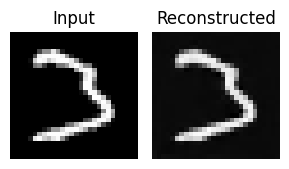

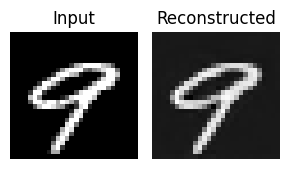

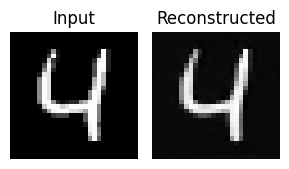

In [ ]:
for _ in range(3):
  index = np.random.randint(len(testDataset))
  image, label = testDataset[index]
  image = image.to(device)
  _image = model(image[None])
  fig, ax = plt.subplots(1,2, figsize=(3,3))
  show(image.squeeze(0), ax=ax[0], title='Input')
  show(_image.squeeze(0).squeeze(0), ax=ax[1], title='Reconstructed')
  plt.tight_layout()
  plt.show()

Text(0.5, 1.0, 'Original Image')

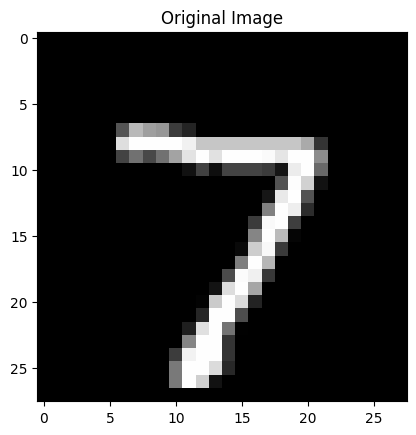

In [ ]:
image, label = testDataset[0]
encodedImage = model.encoder(image.to(device))
plt.imshow(image.squeeze(0), cmap='gray'); plt.title('Original Image')

<ipython-input-20-e7518ef0289f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,4,figsize=(10,10))


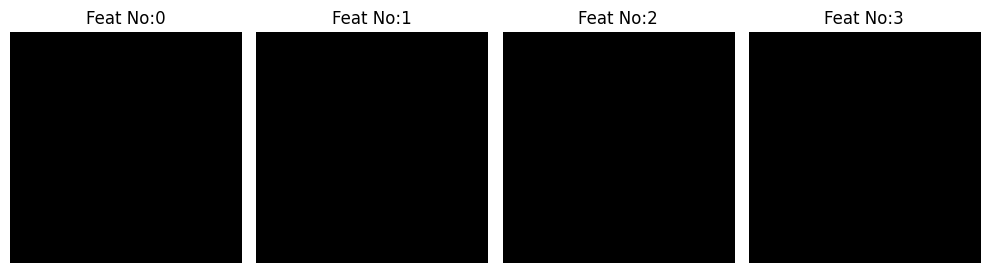

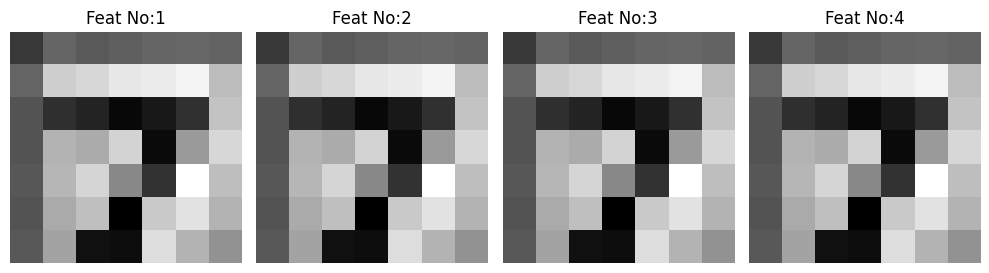

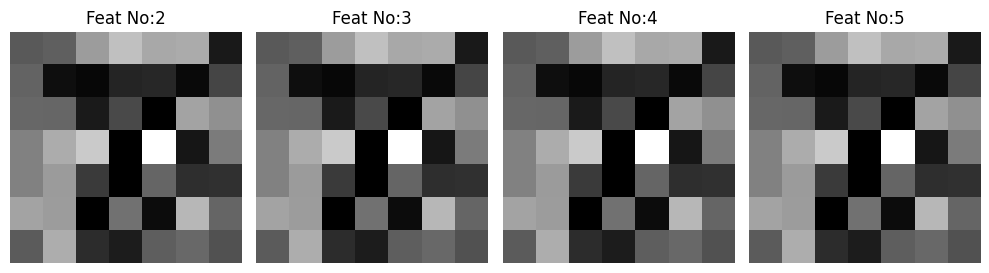

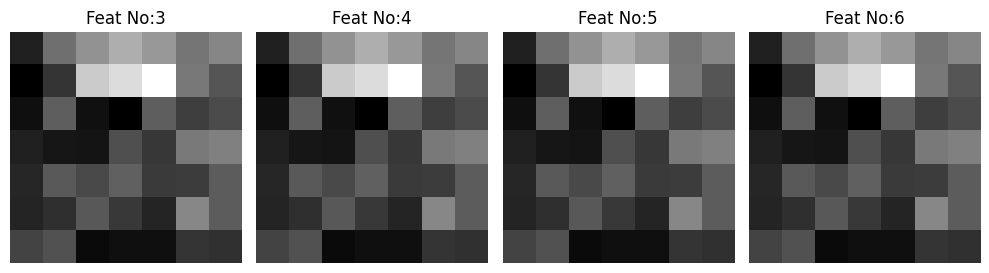

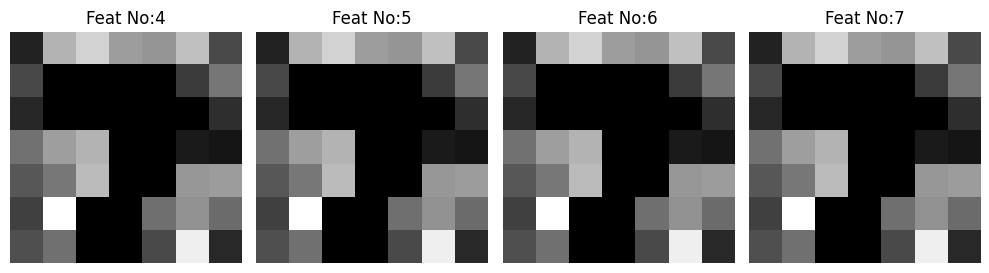

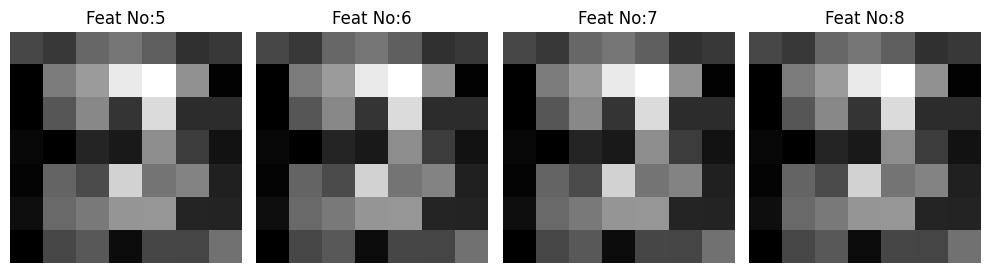

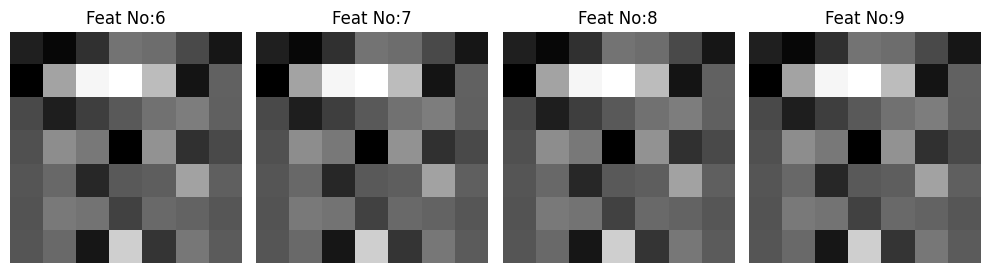

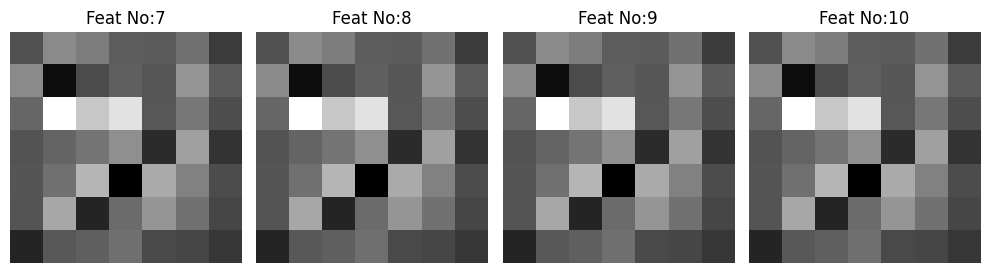

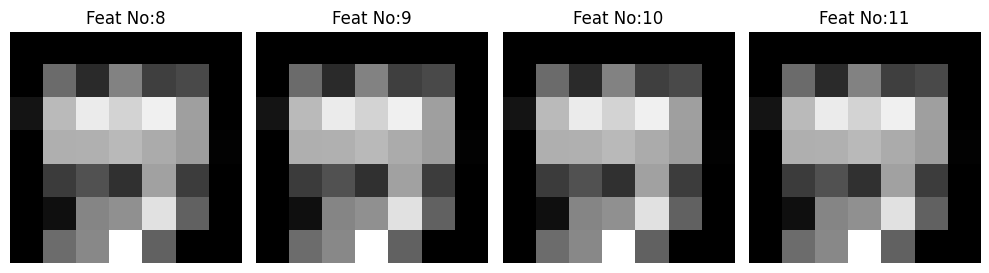

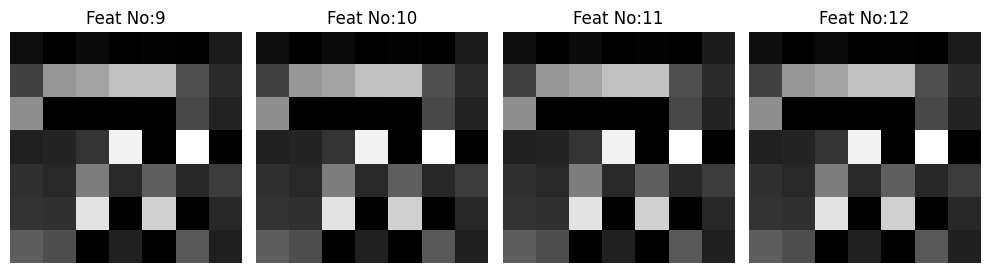

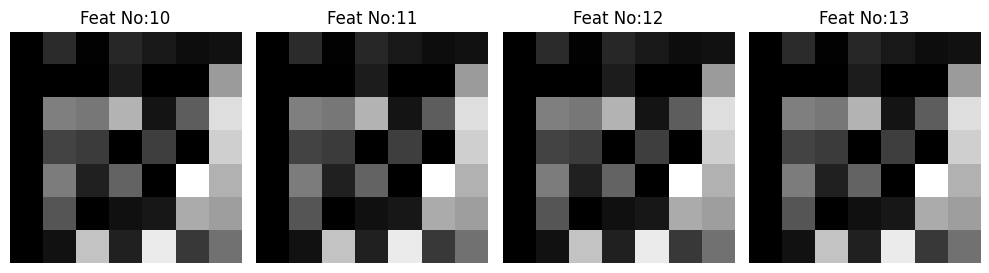

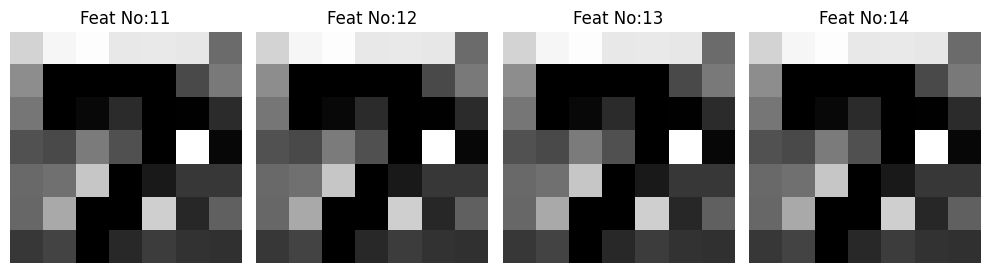

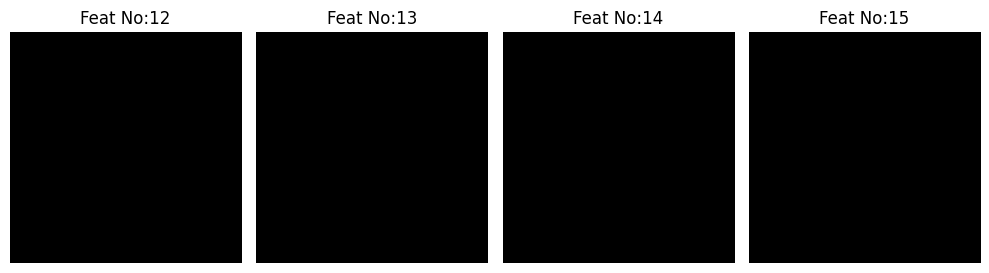

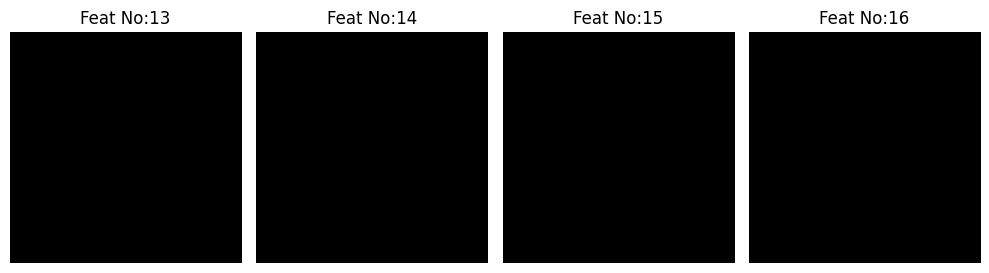

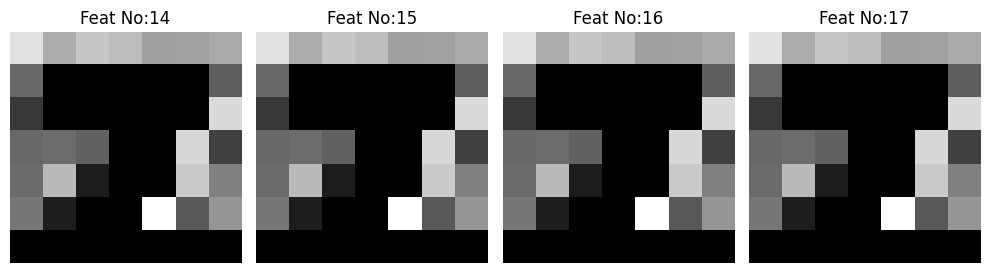

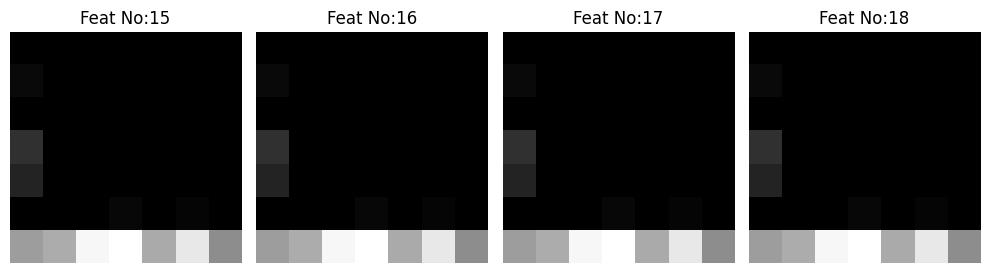

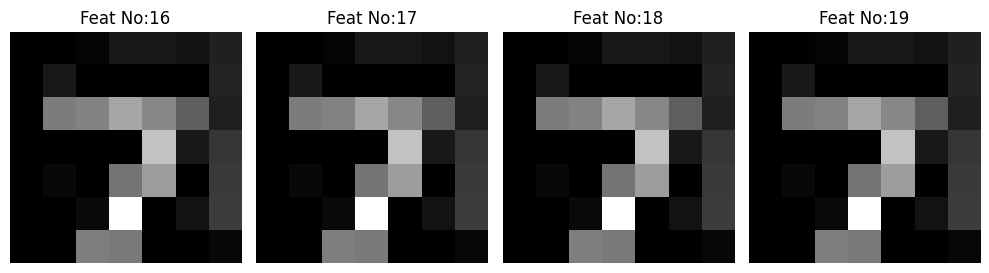

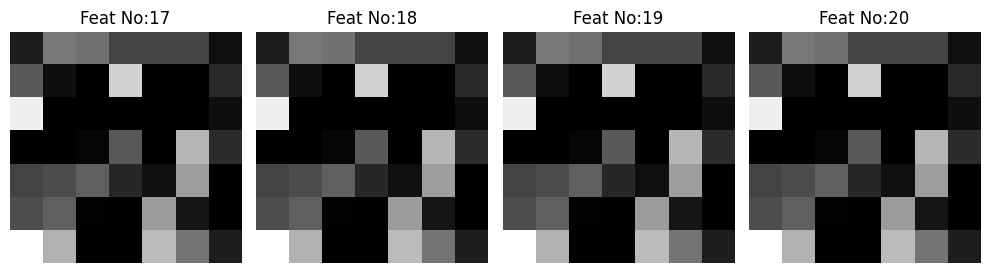

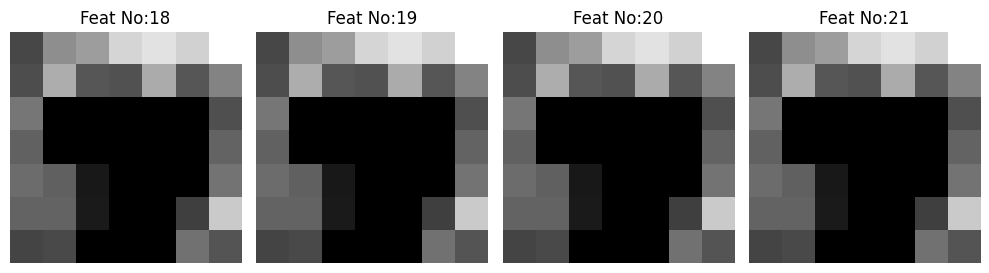

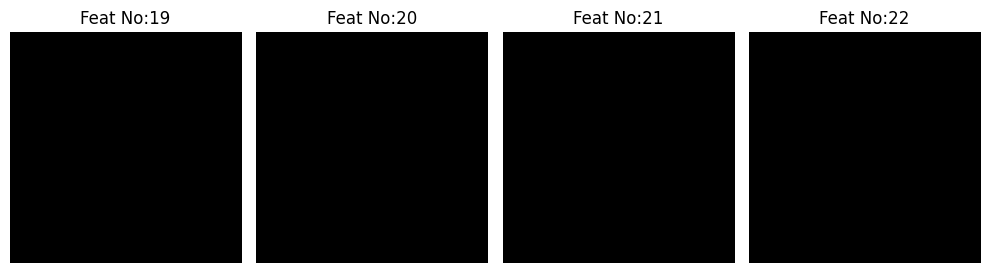

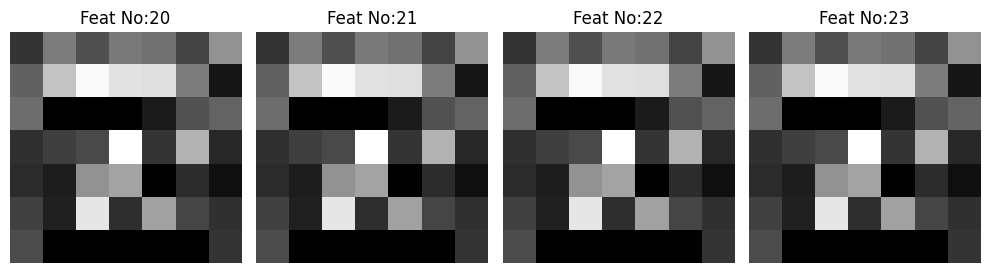

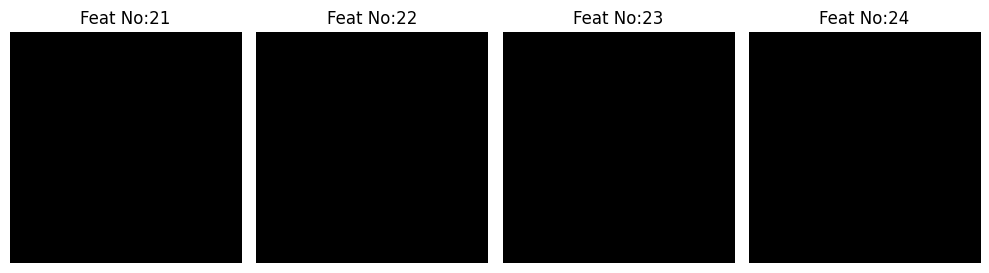

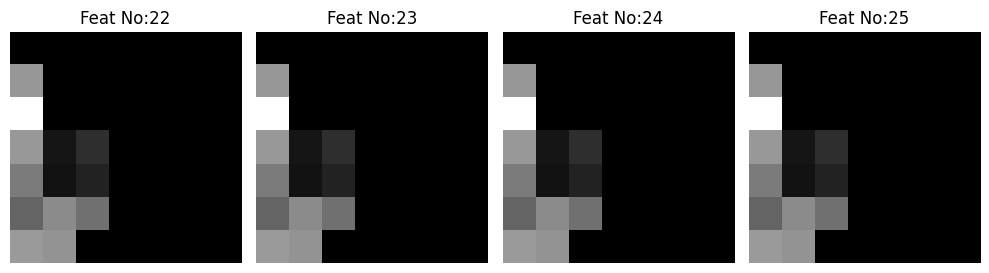

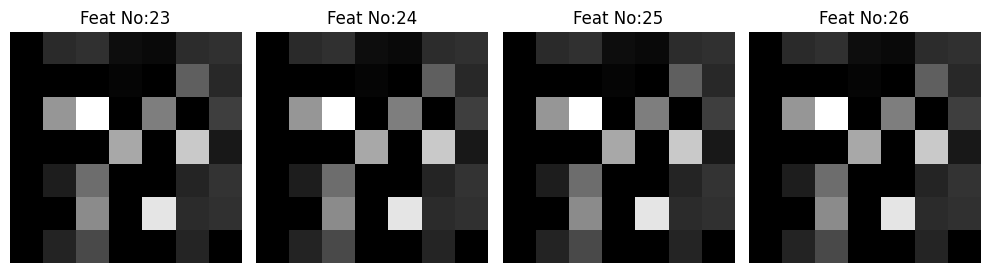

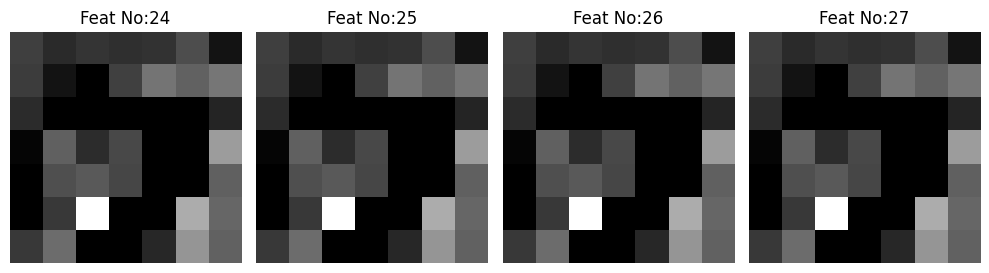

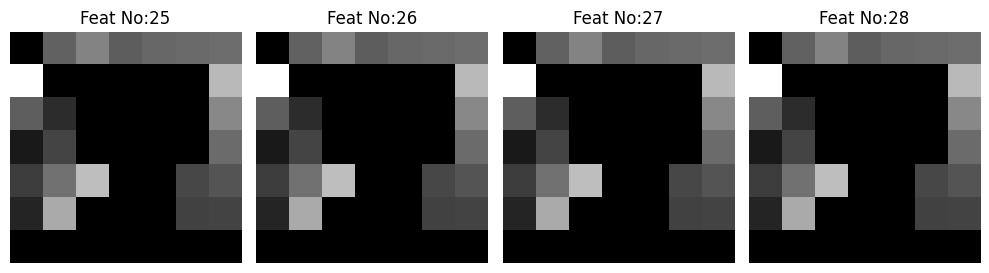

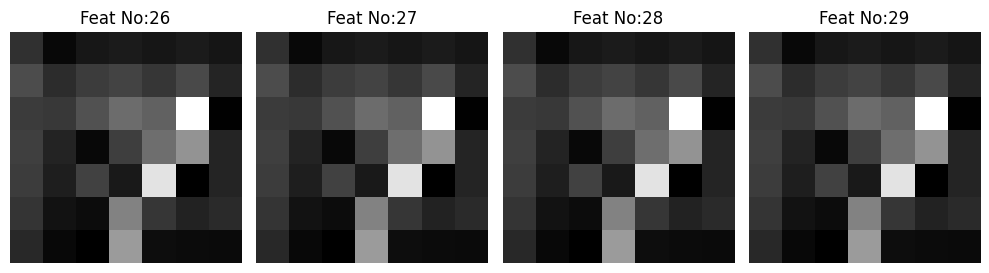

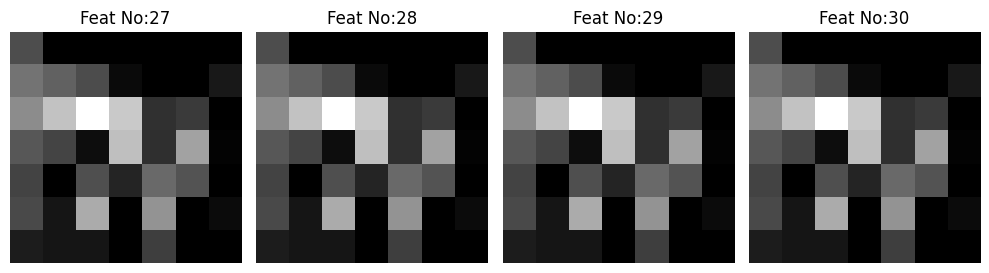

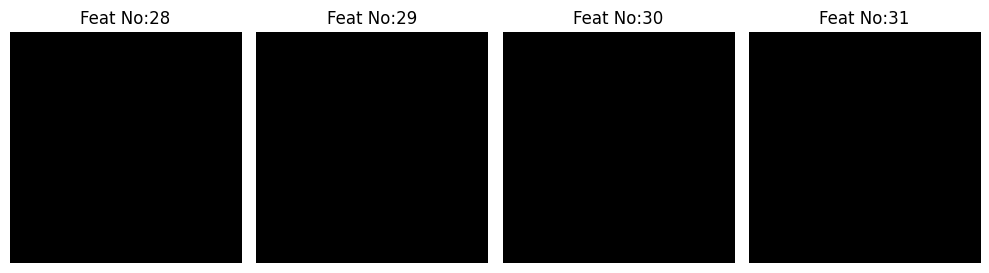

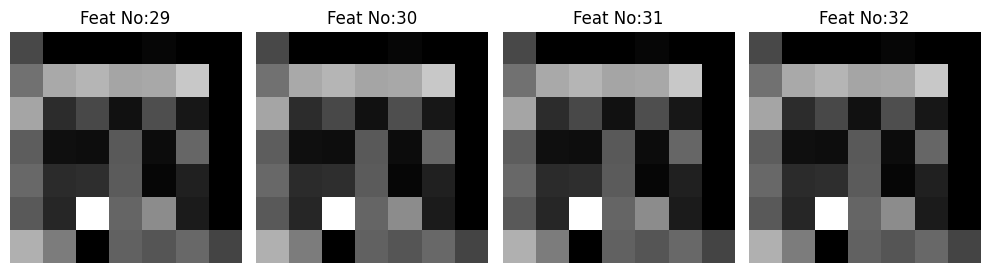

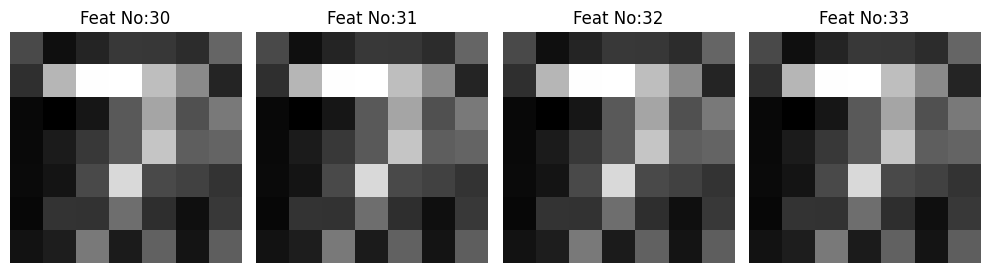

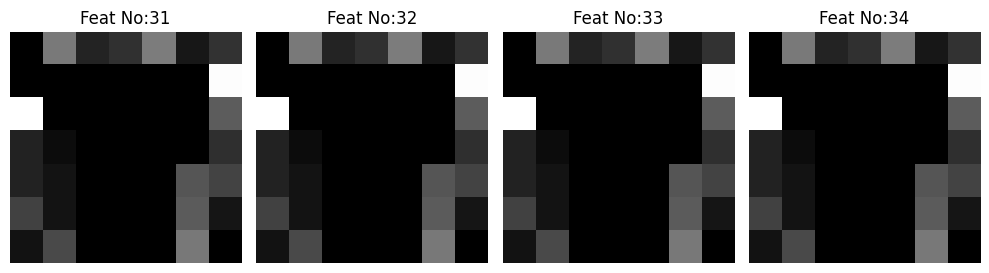

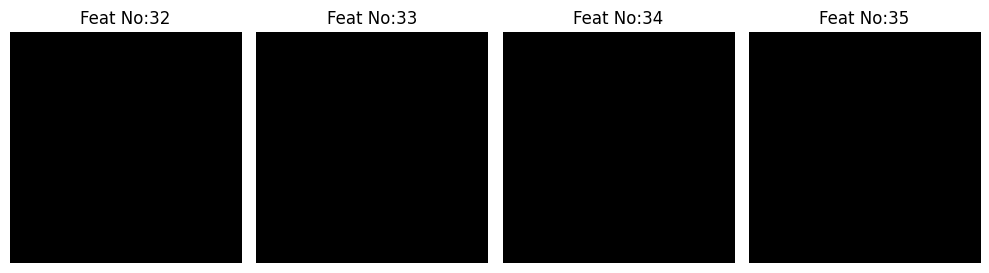

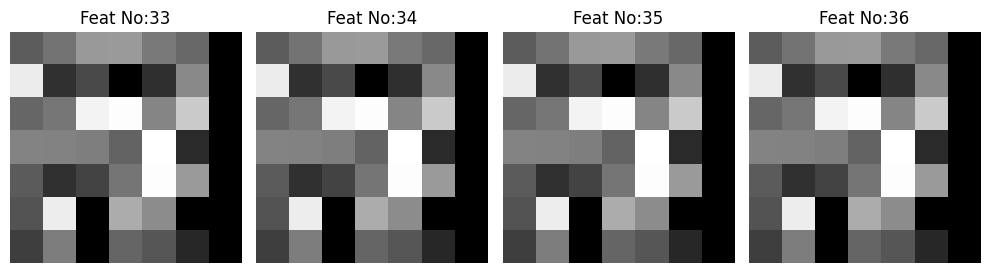

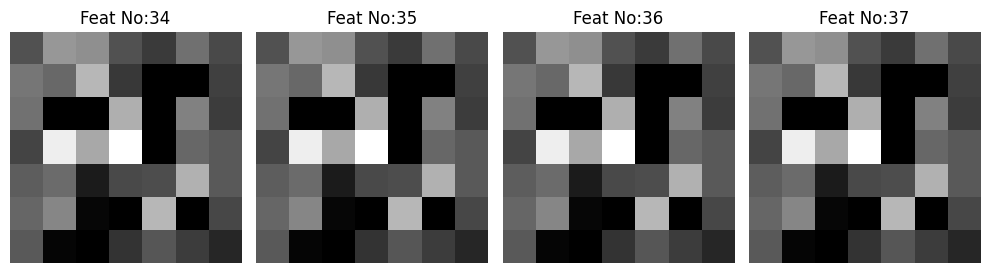

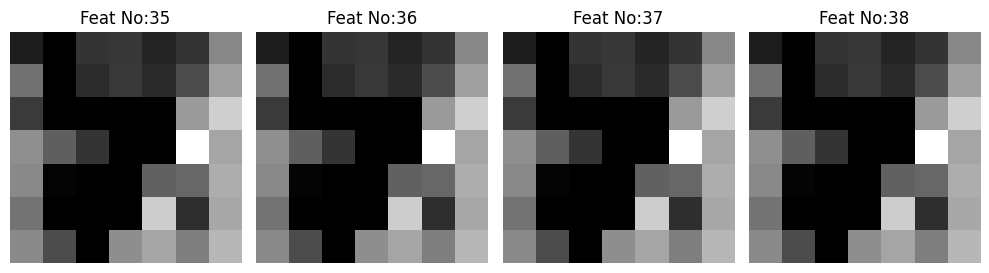

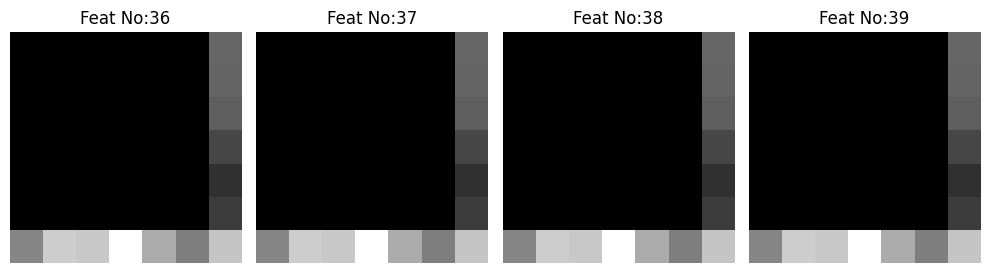

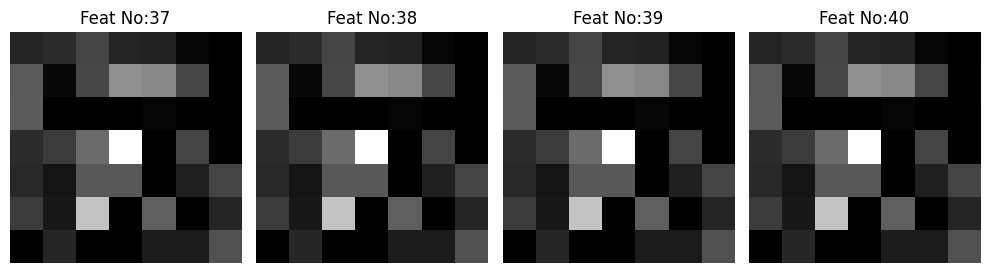

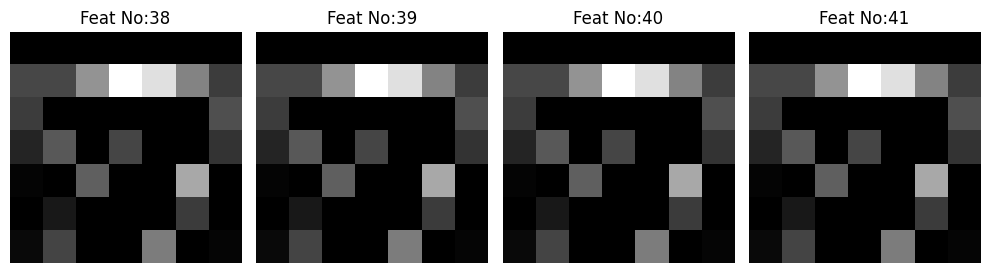

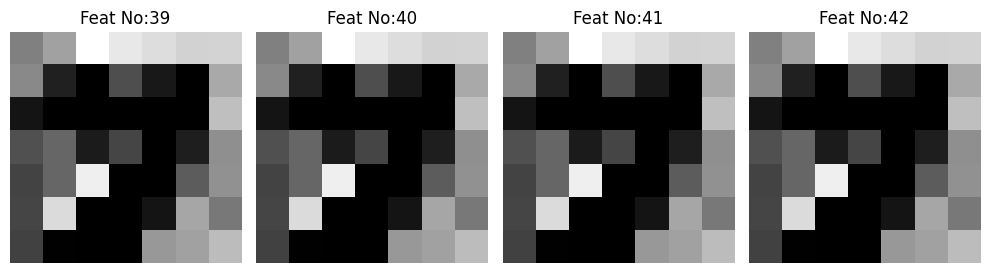

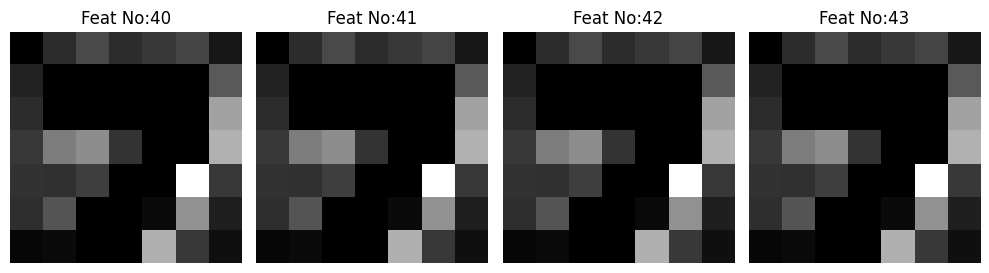

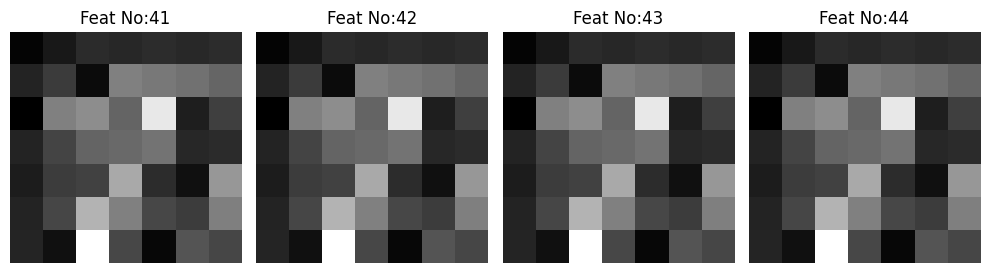

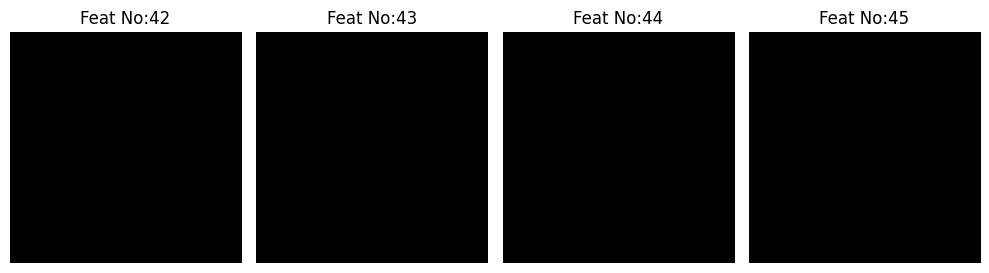

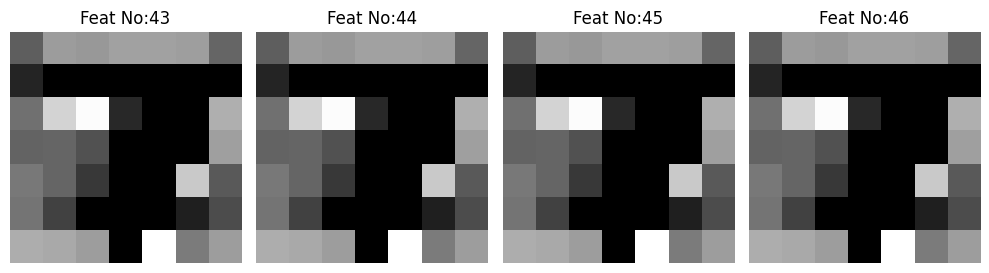

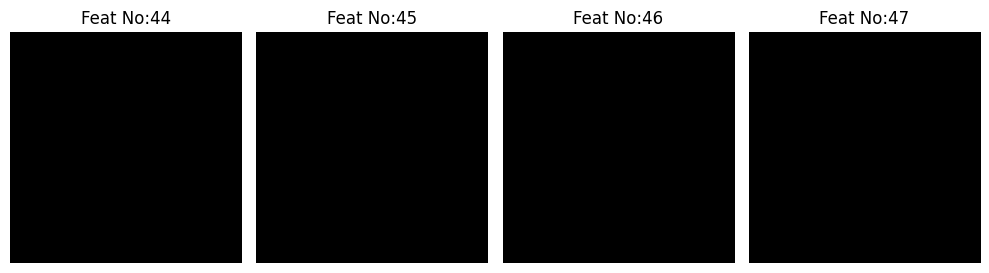

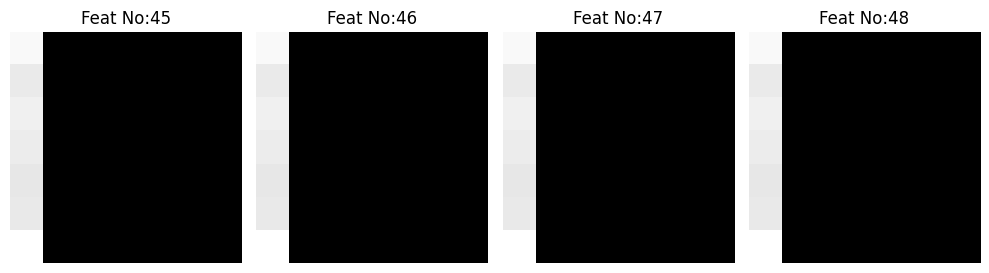

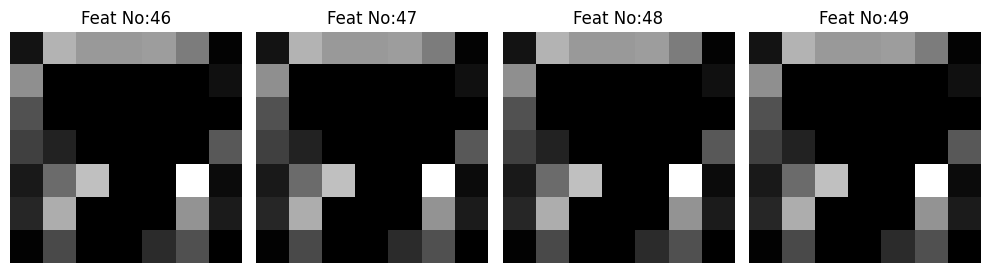

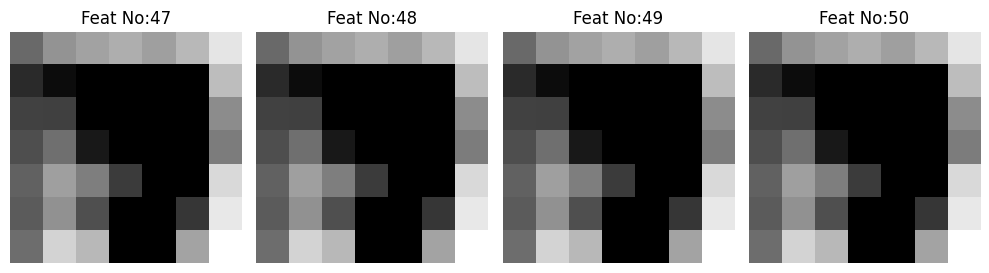

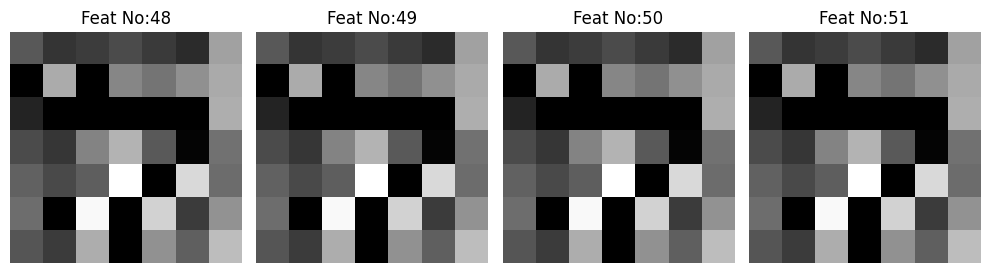

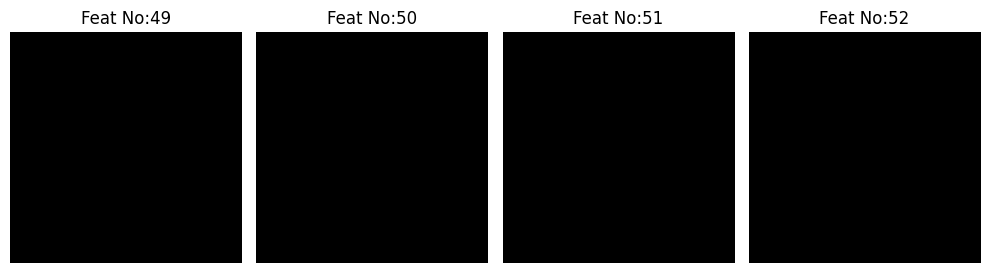

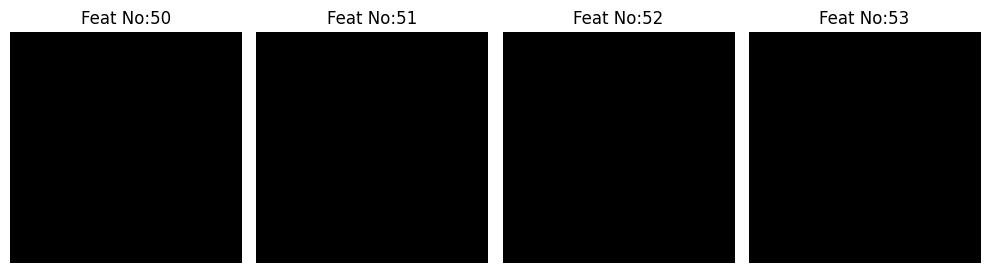

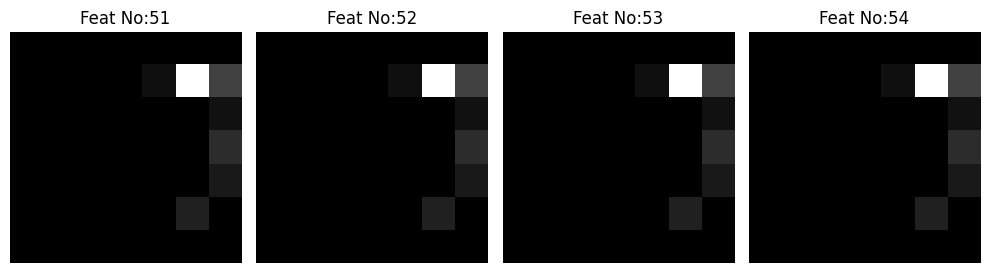

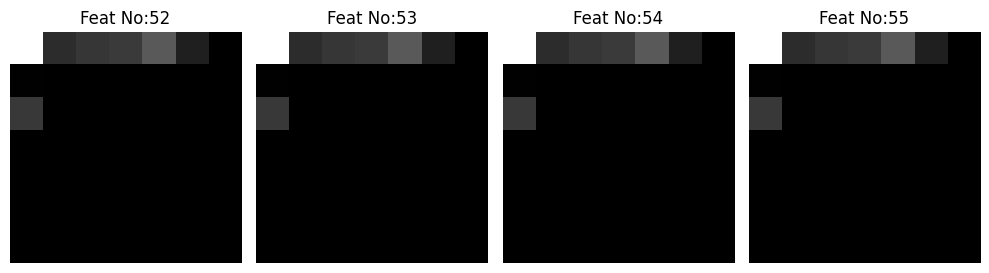

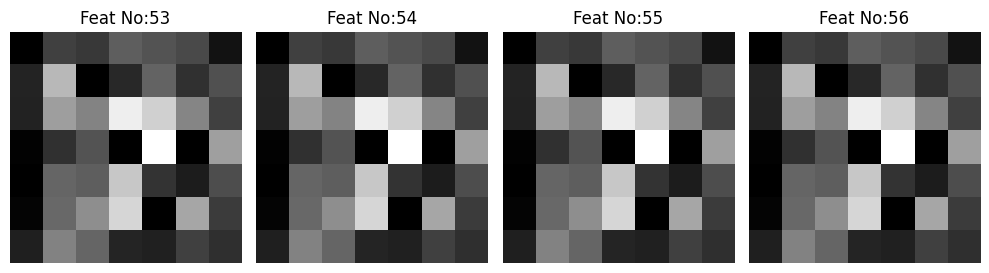

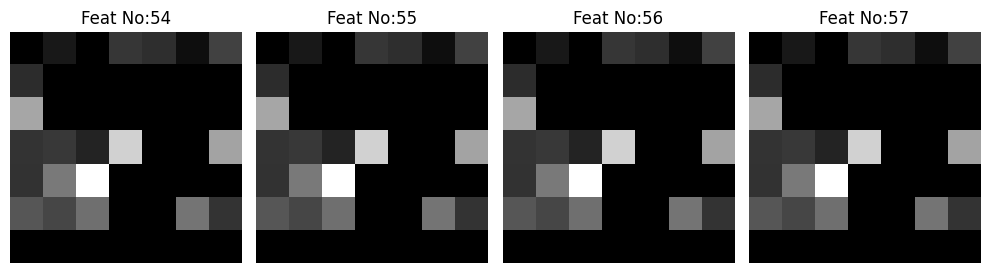

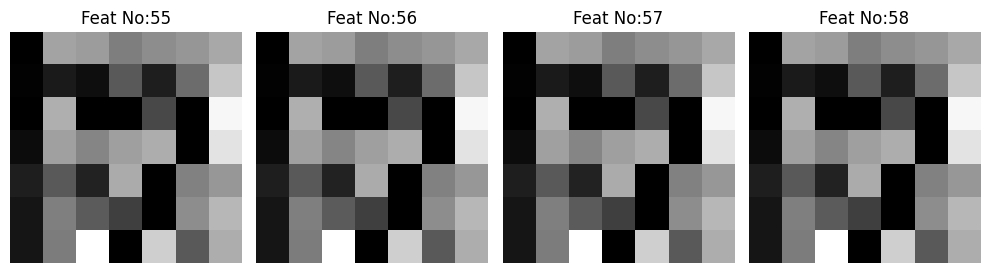

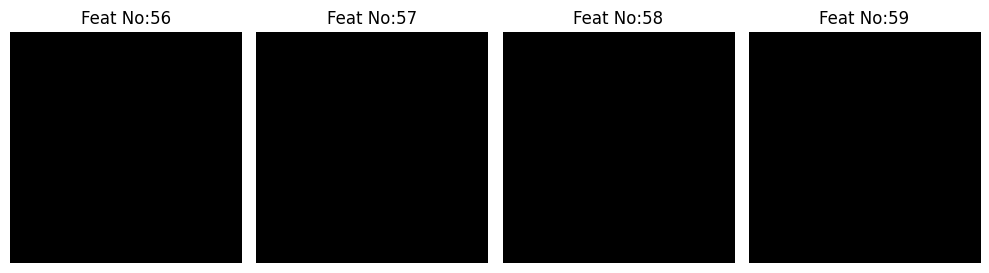

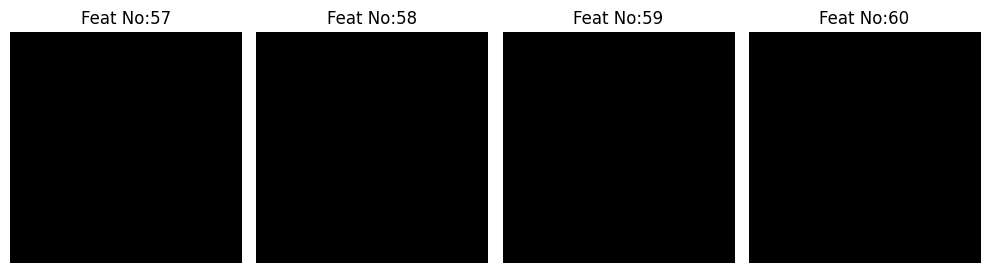

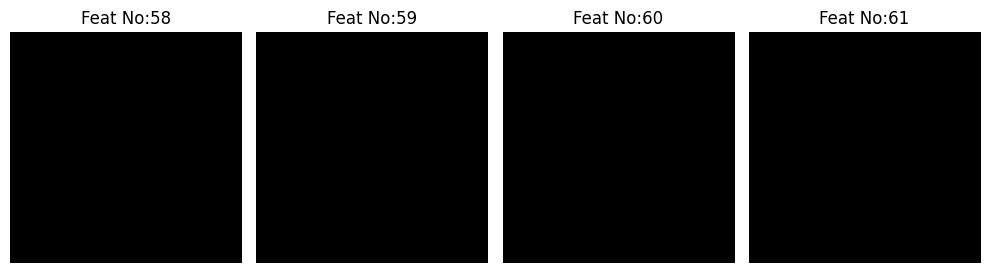

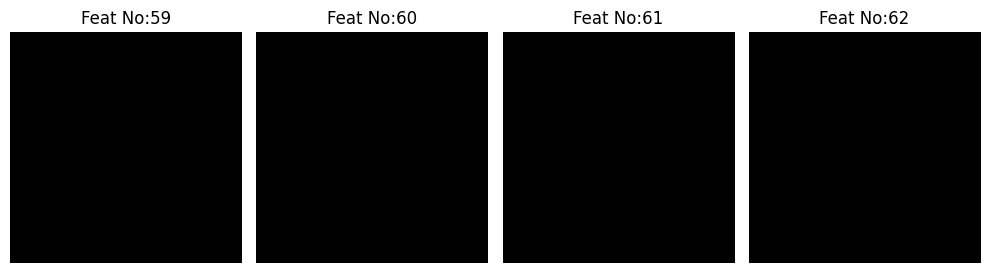

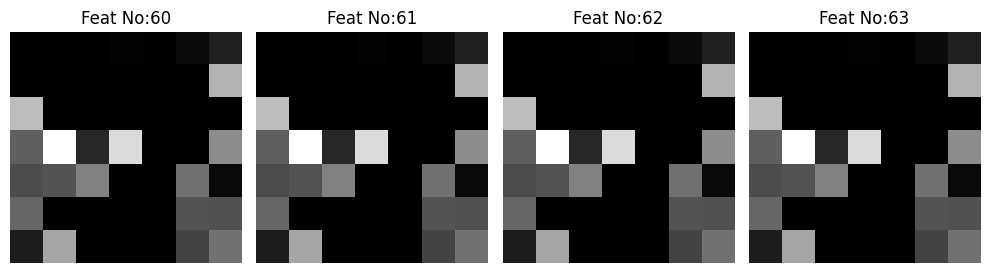

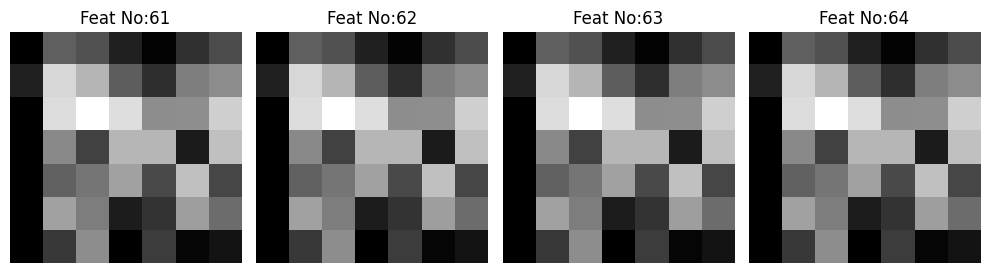

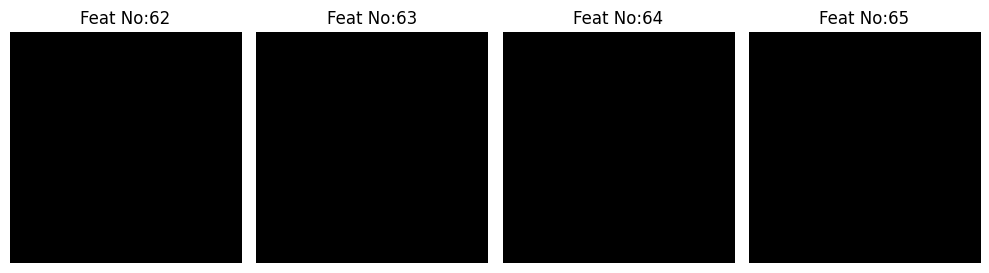

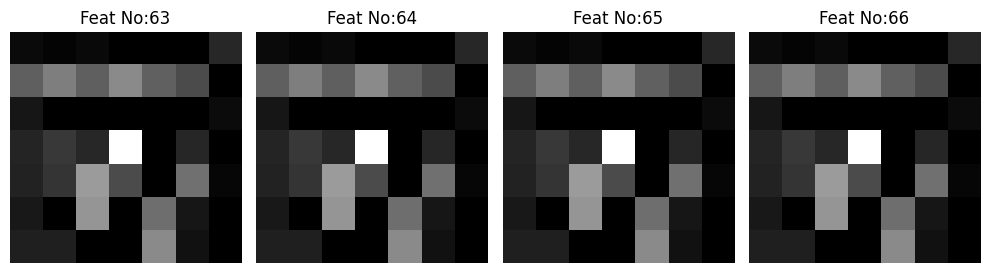

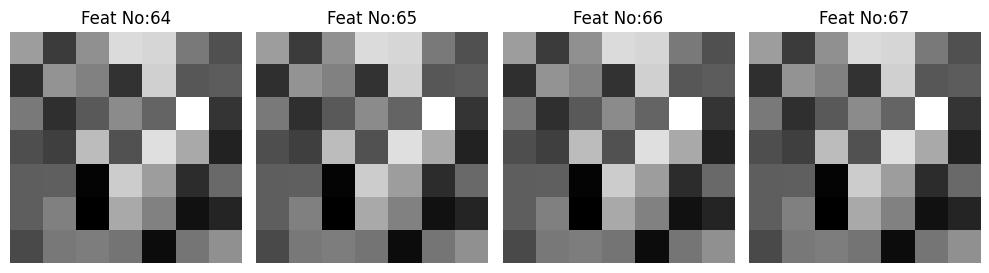

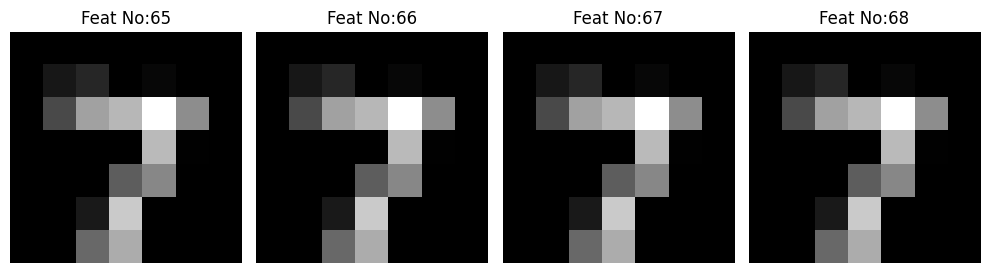

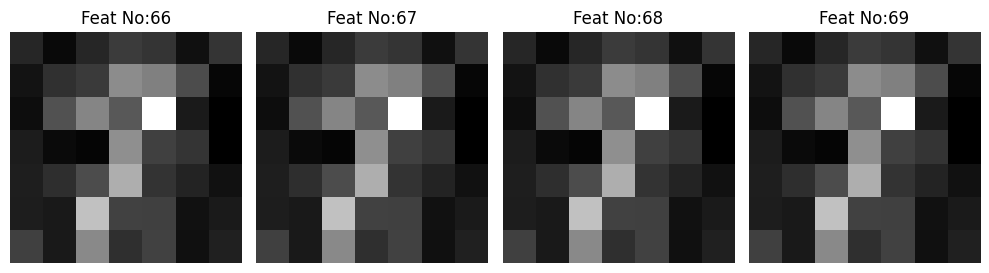

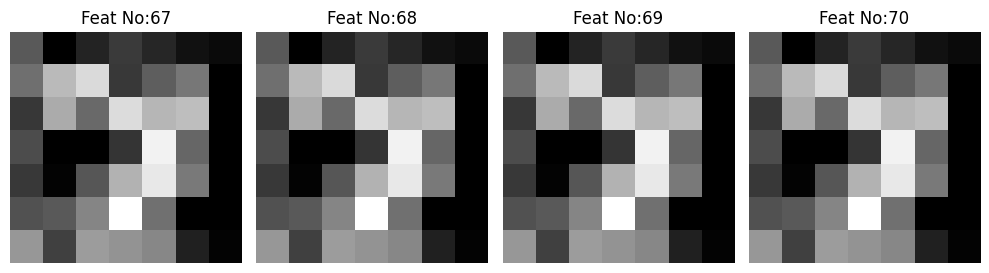

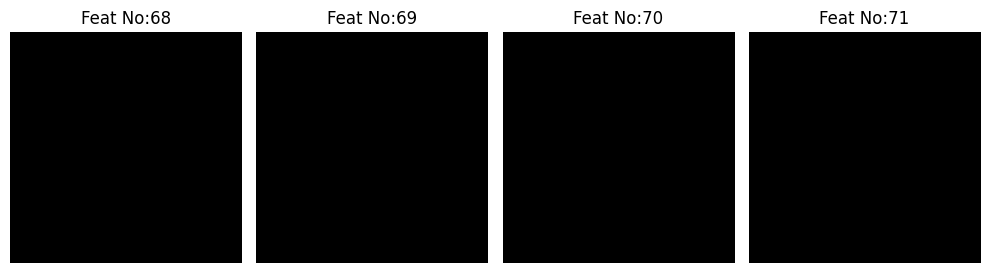

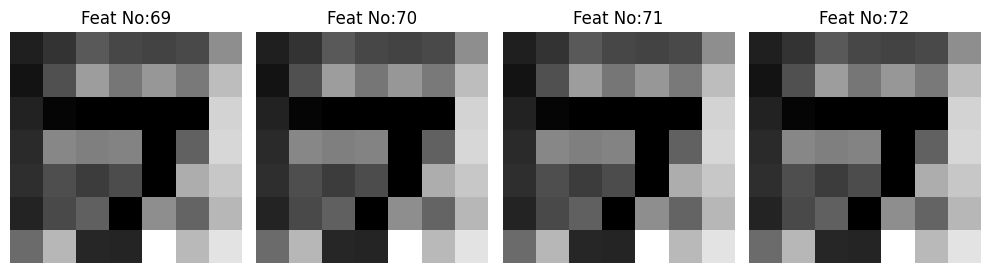

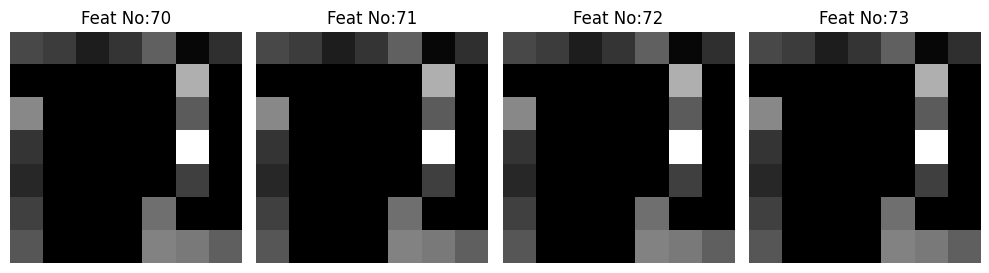

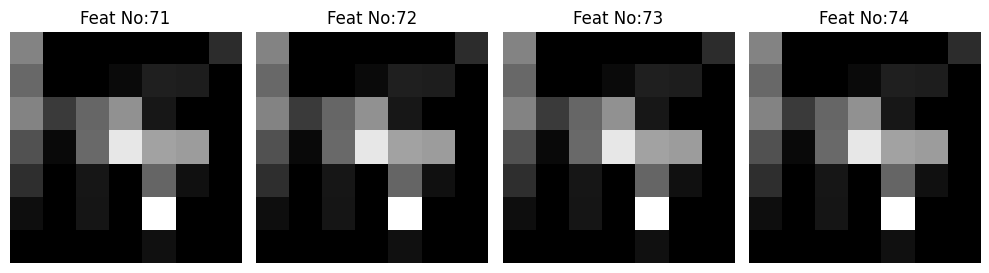

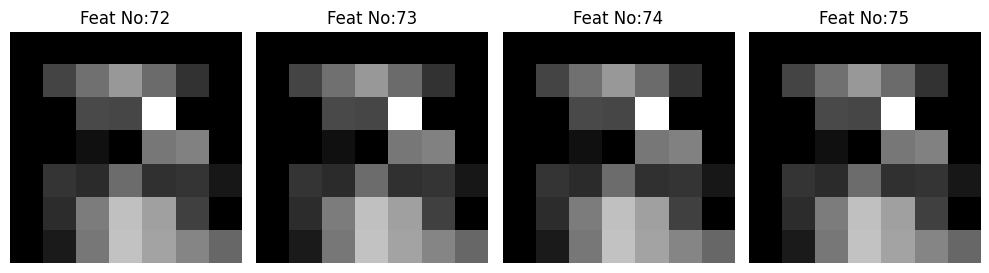

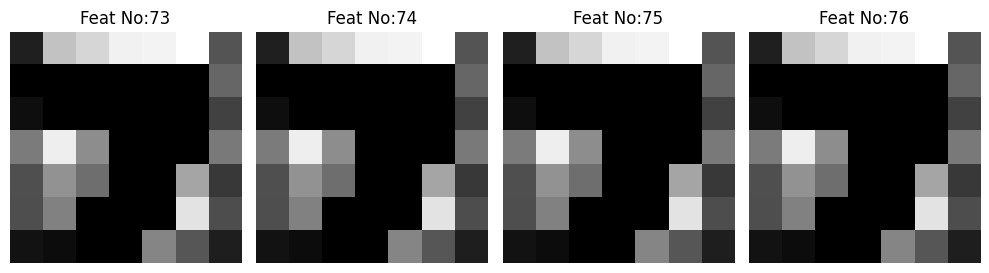

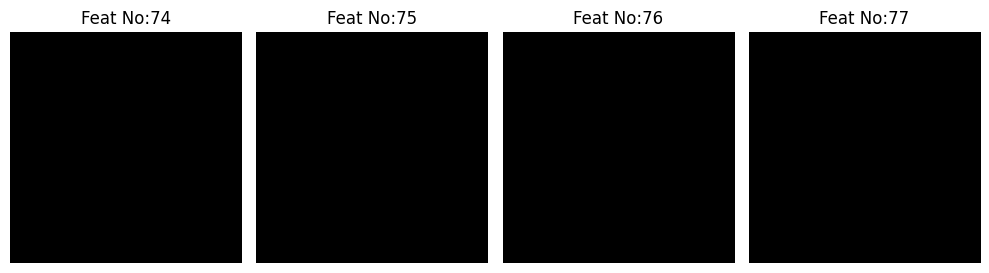

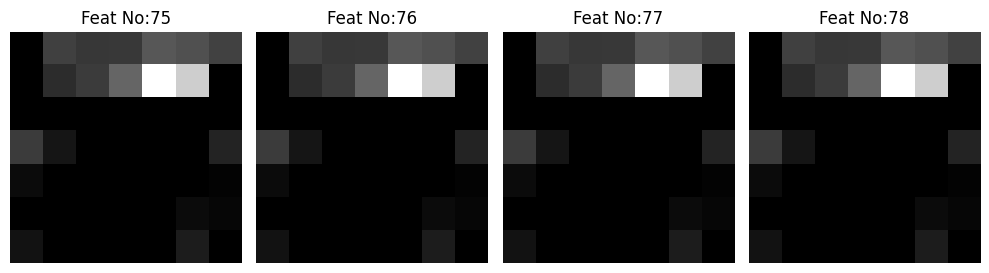

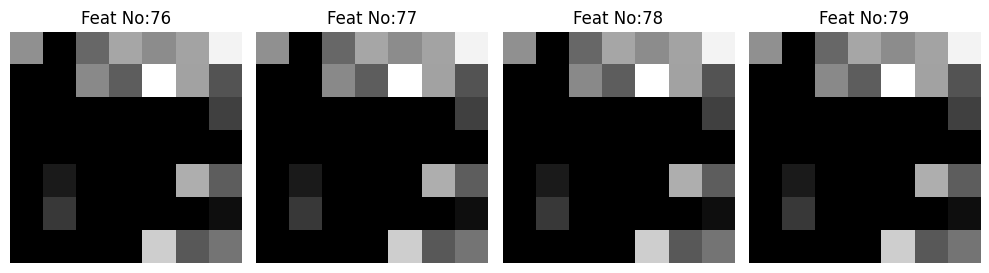

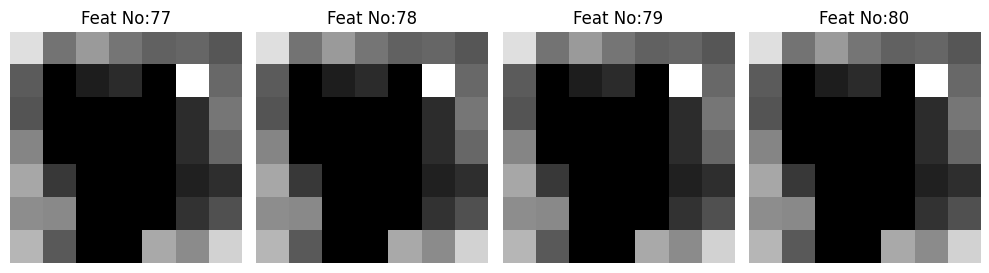

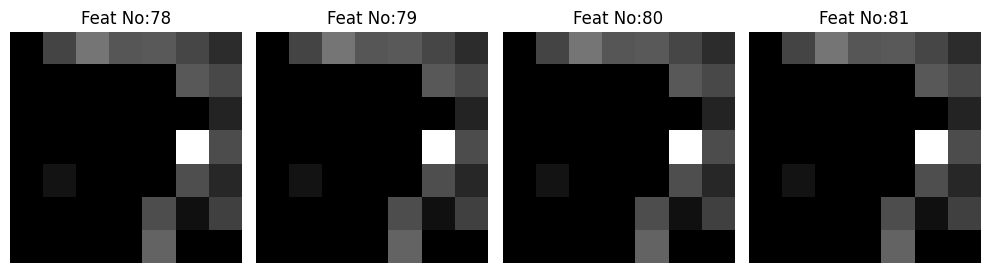

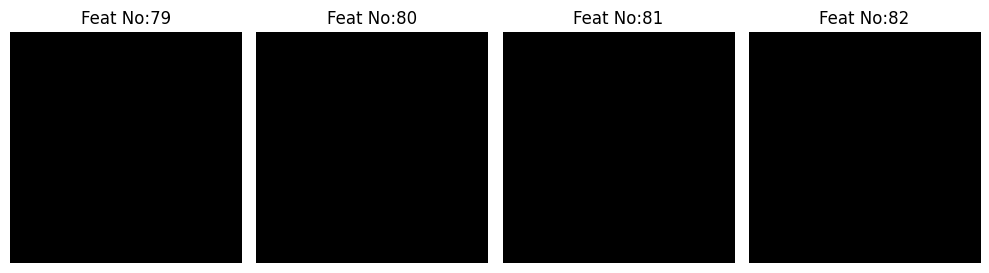

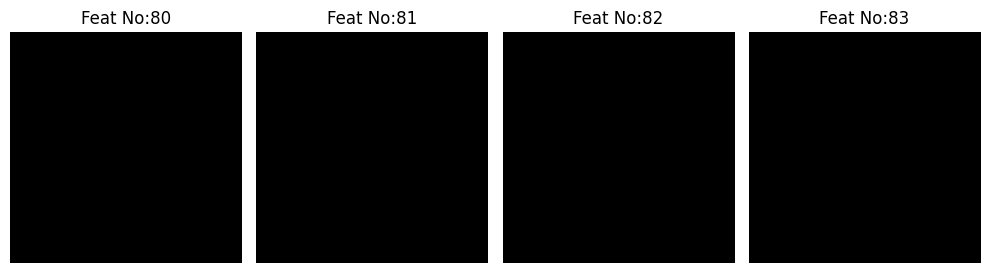

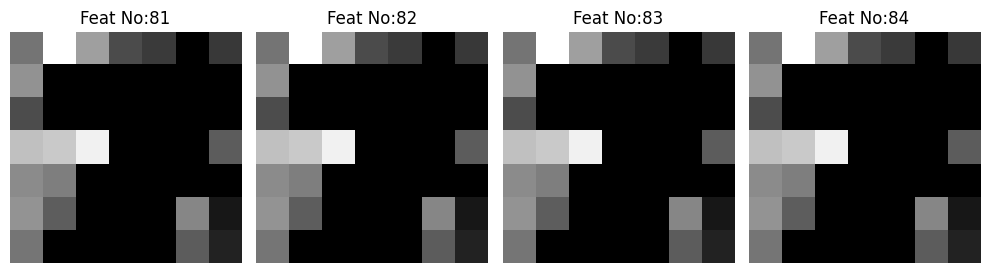

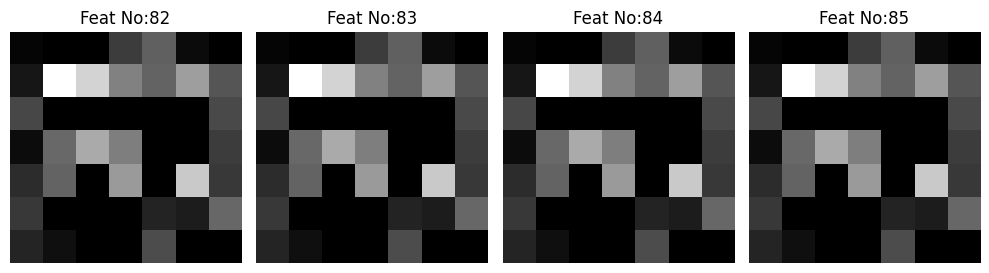

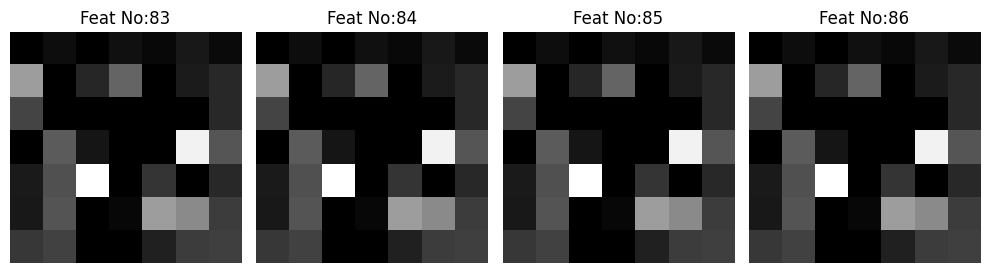

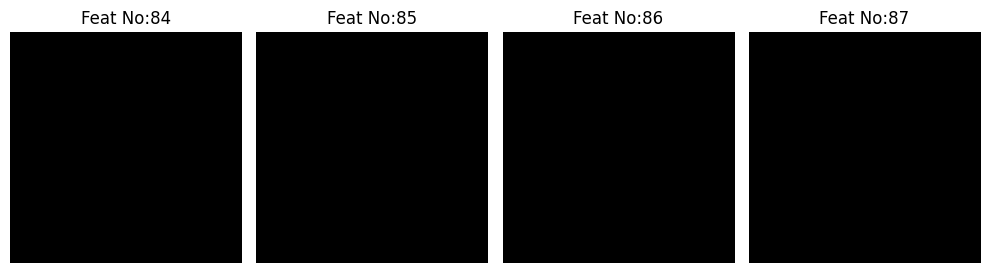

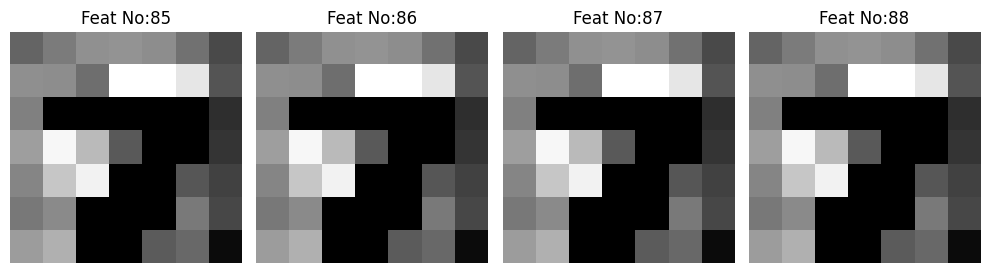

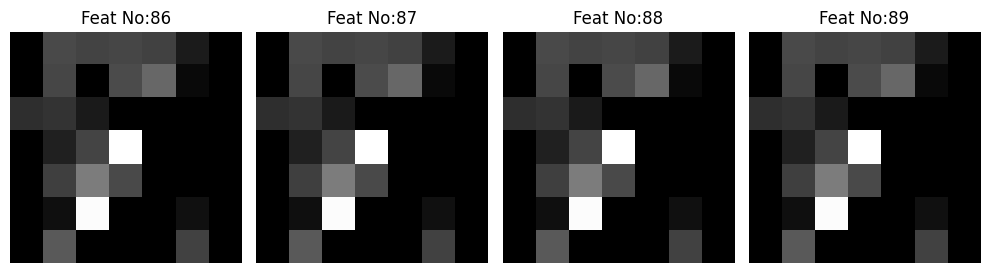

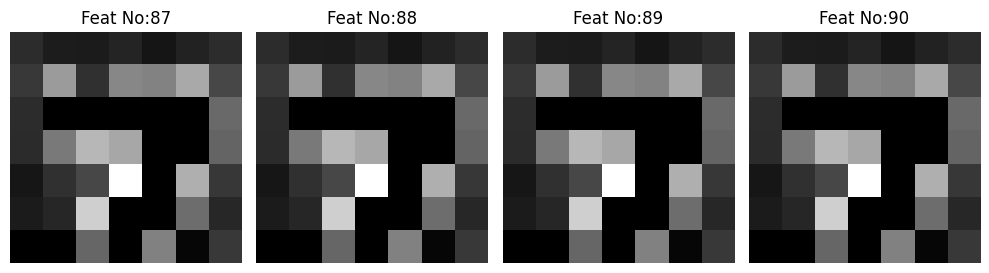

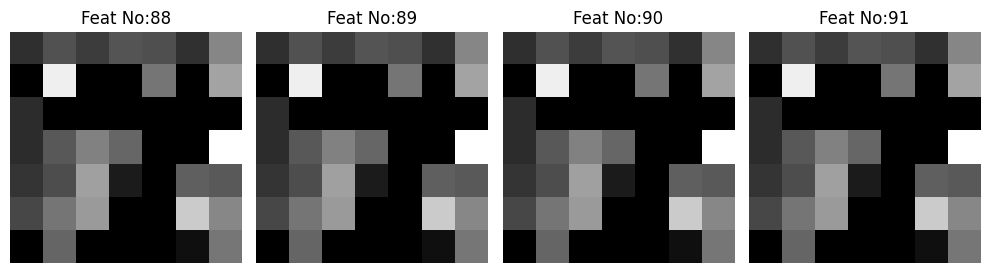

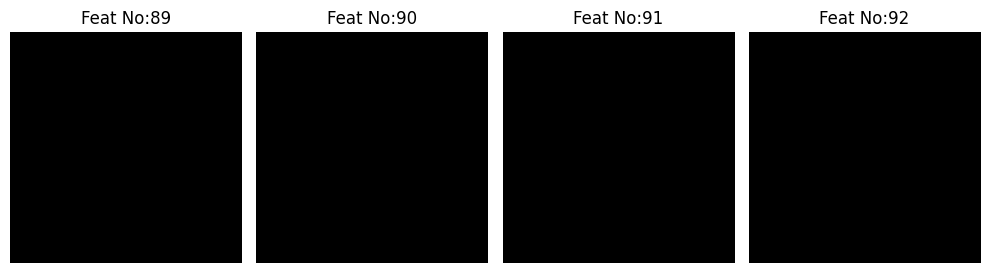

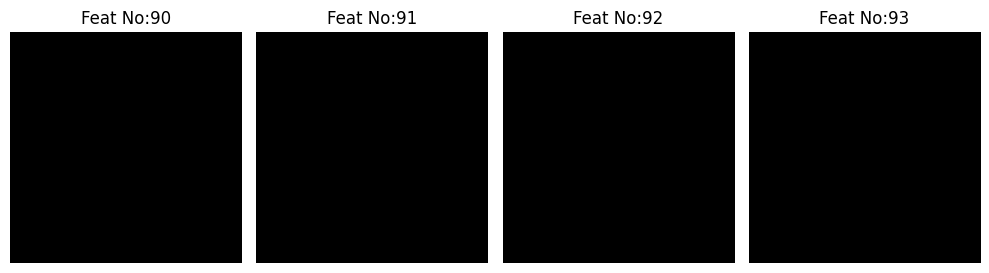

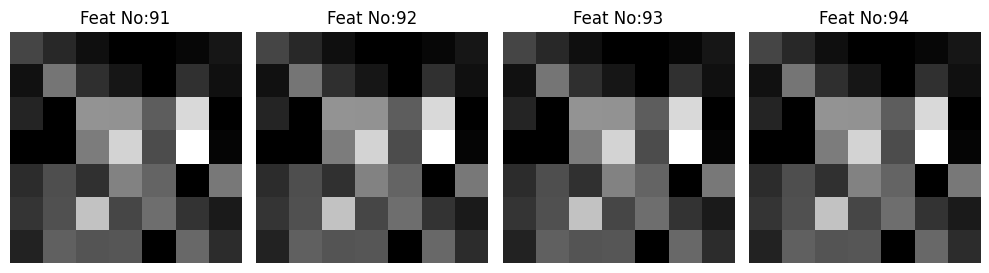

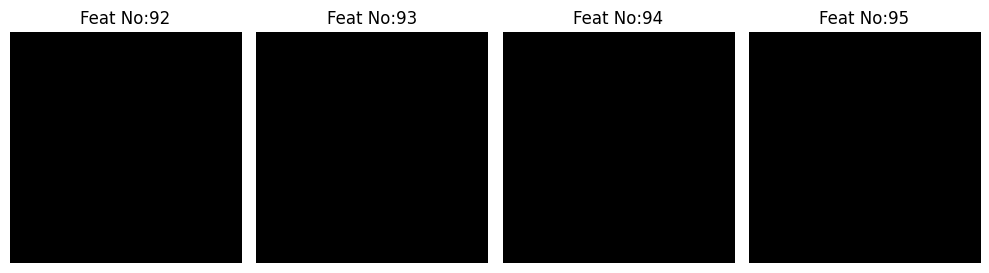

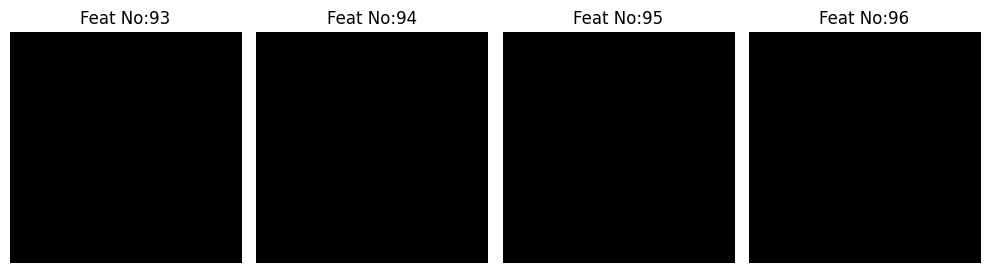

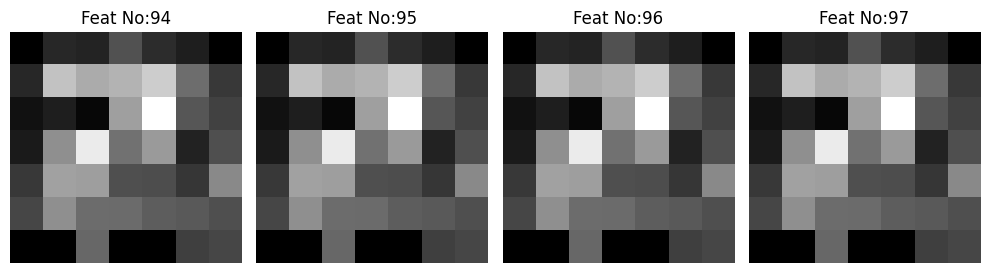

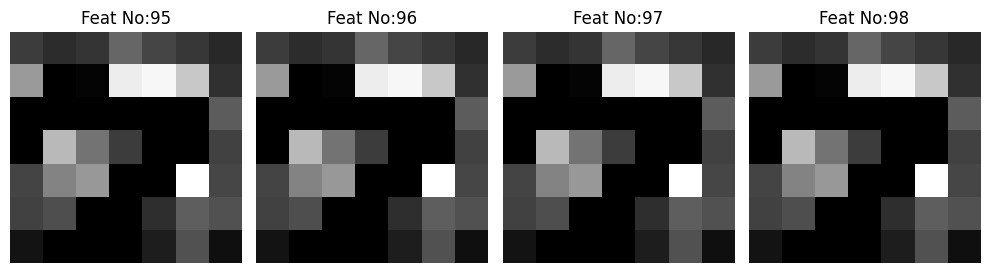

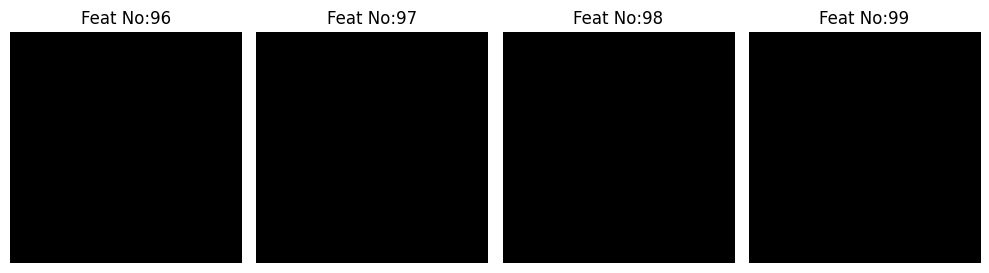

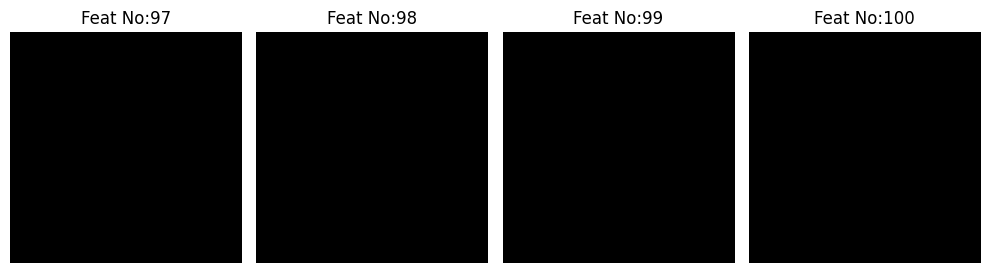

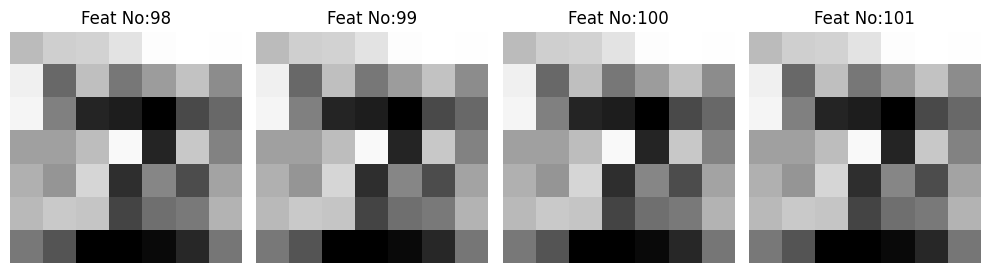

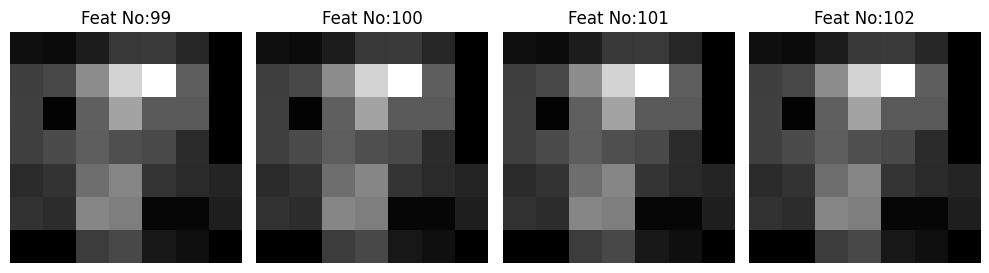

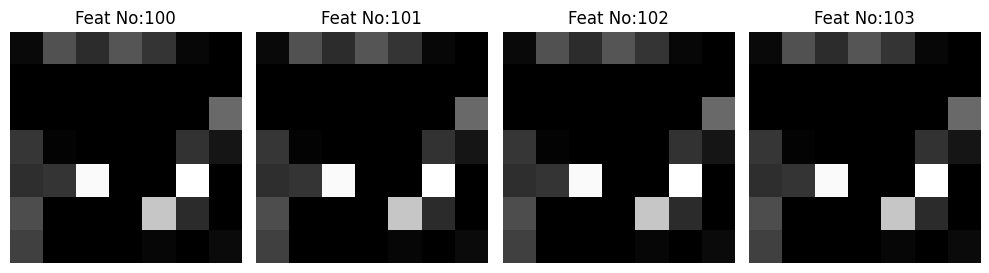

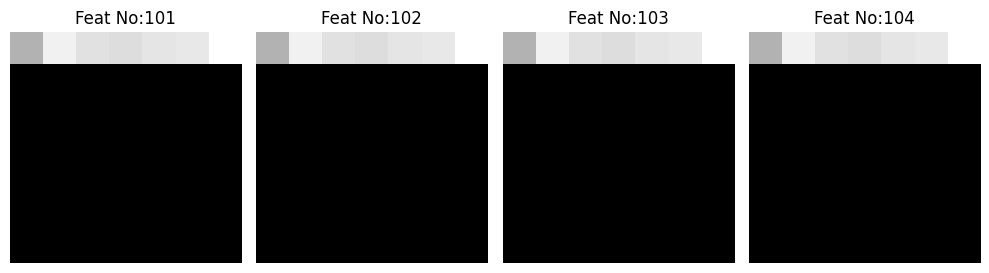

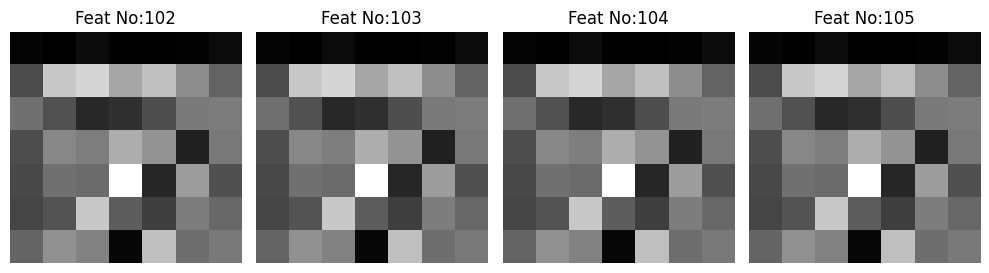

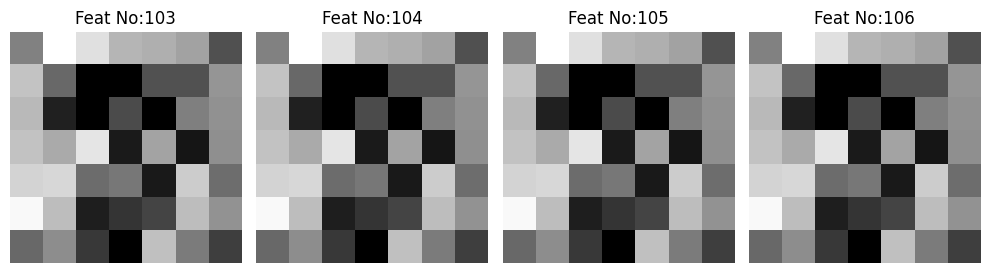

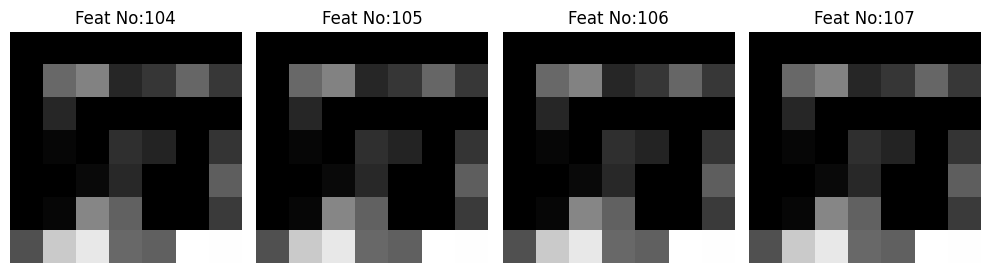

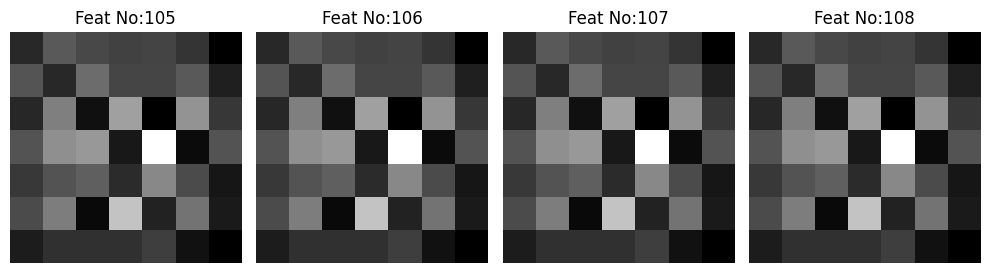

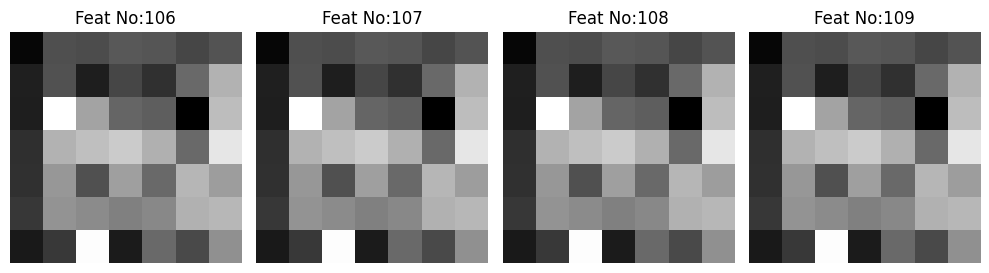

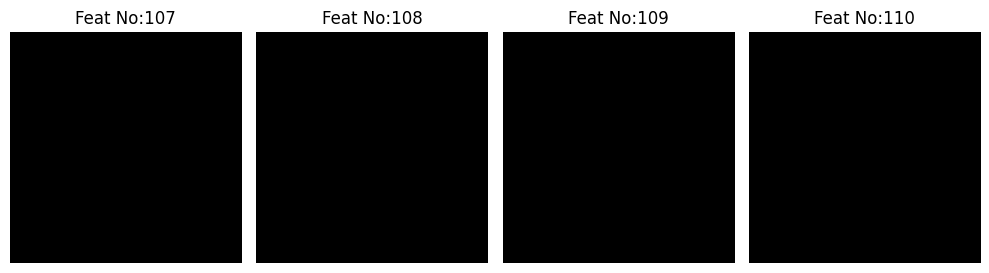

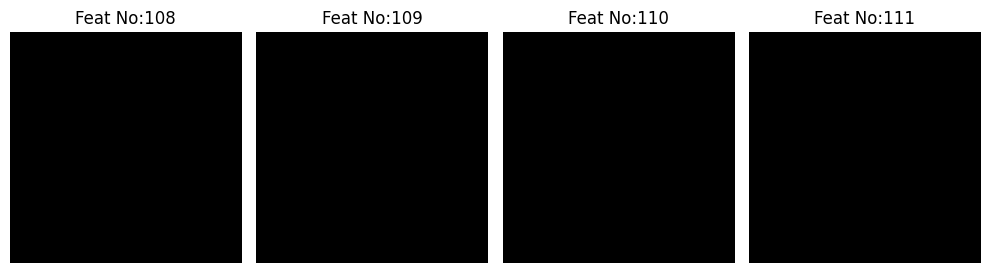

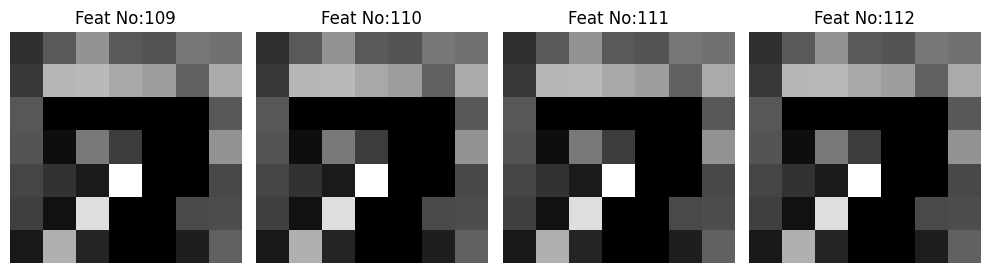

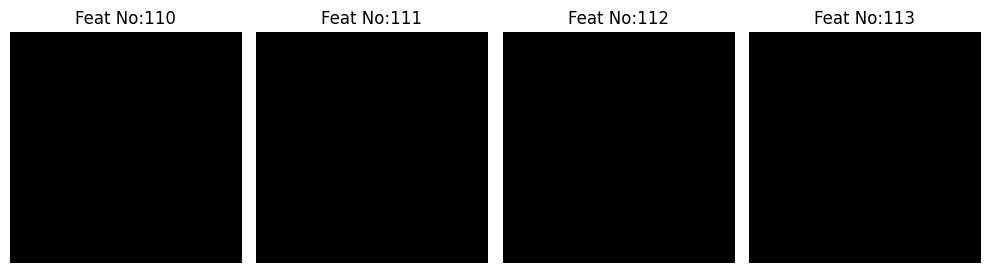

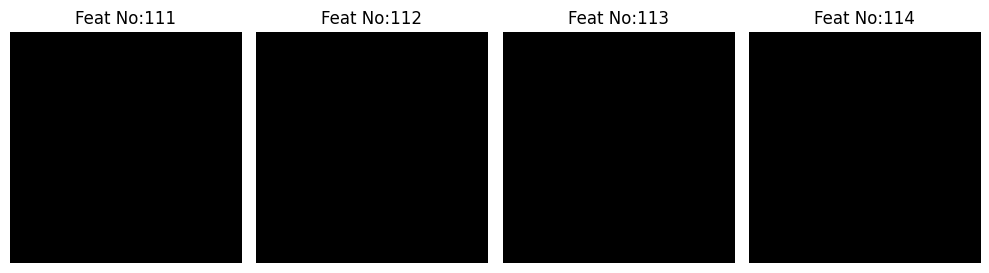

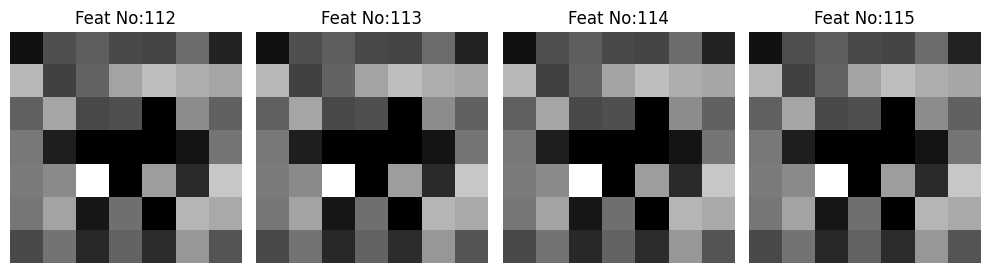

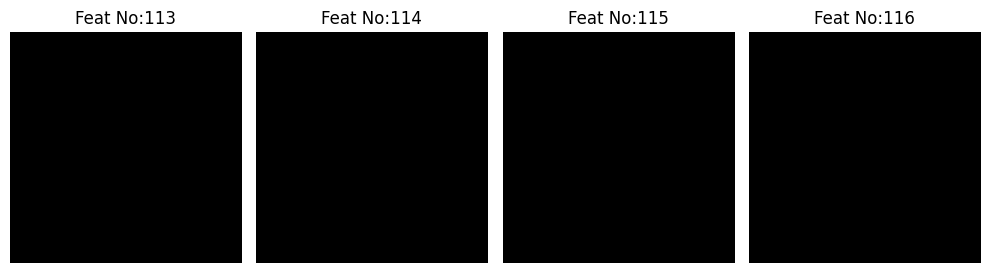

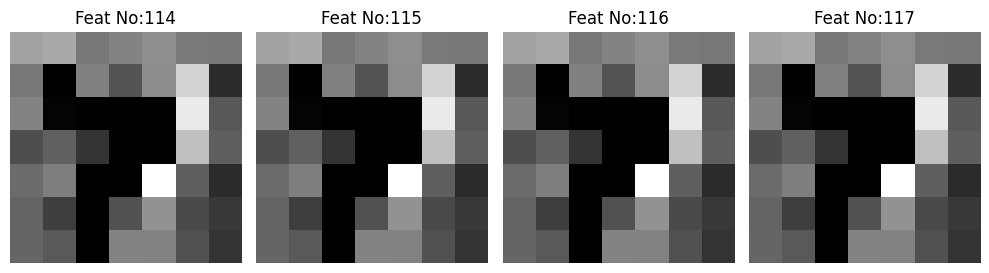

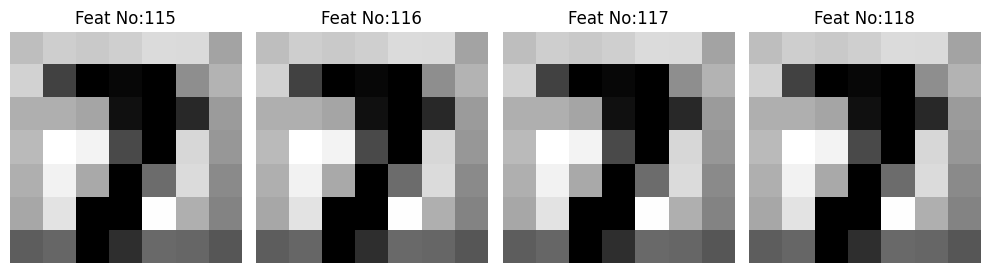

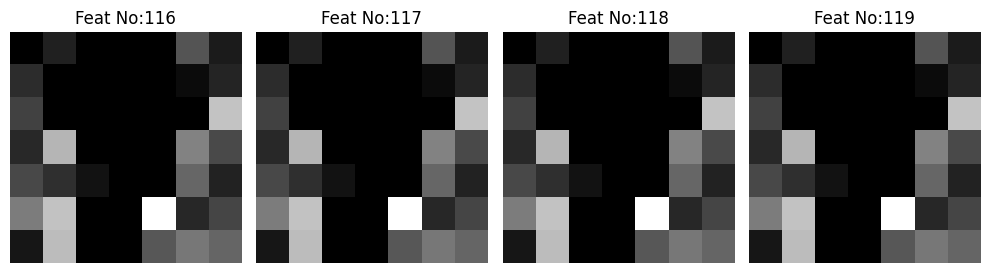

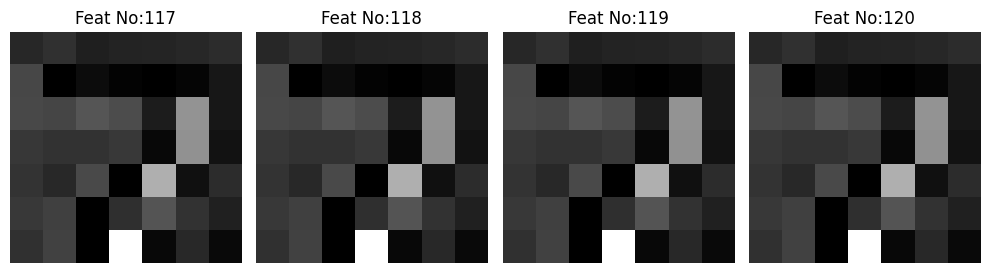

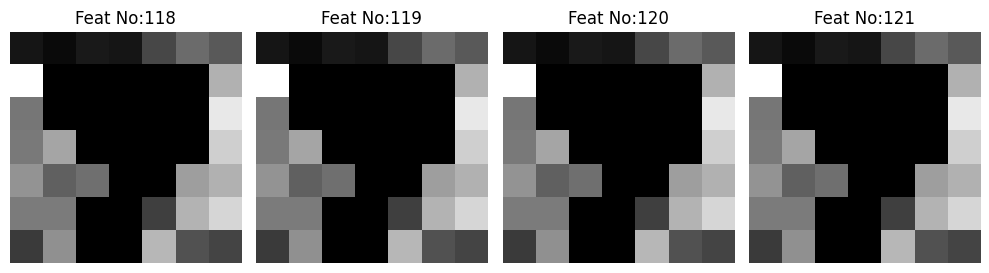

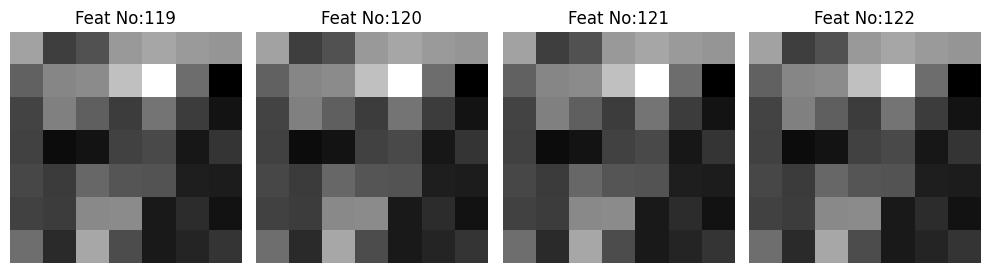

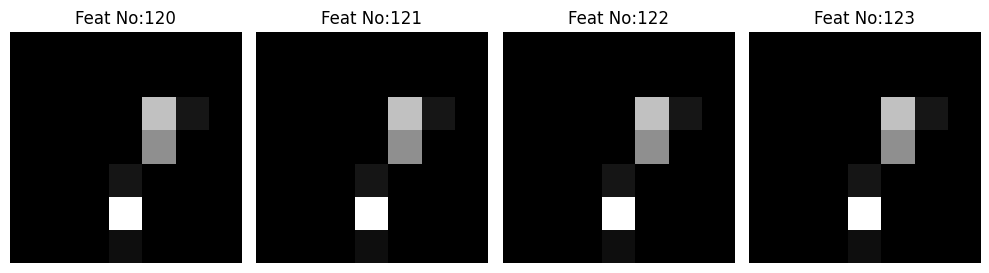

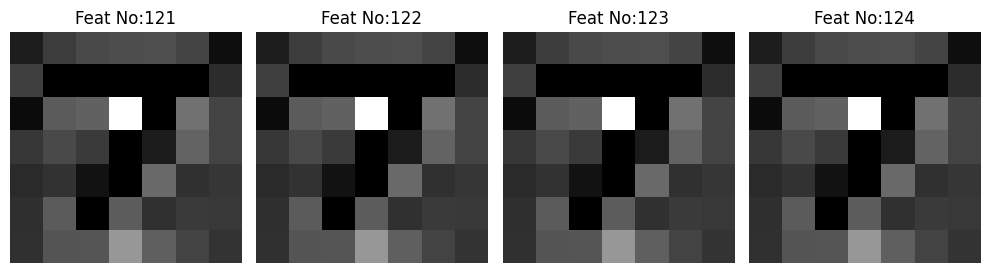

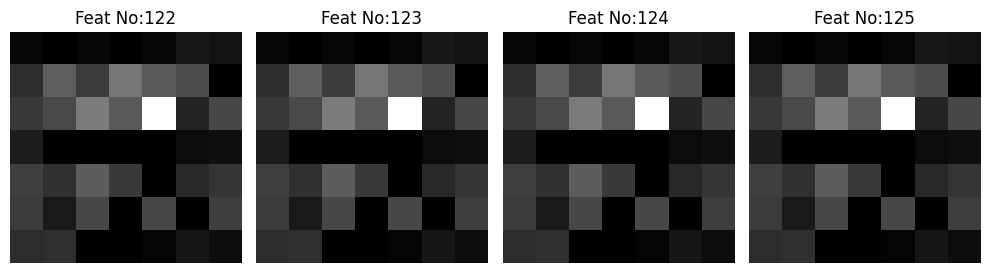

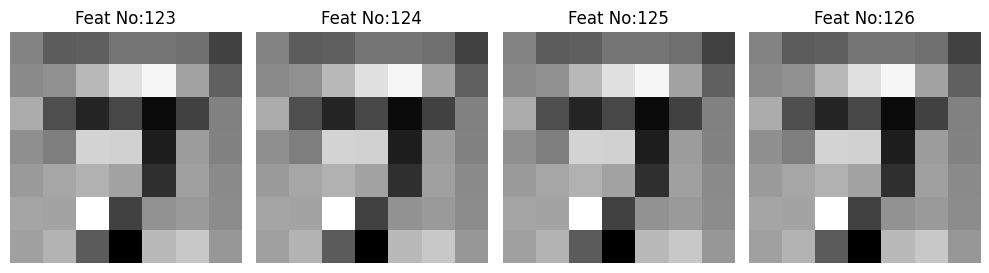

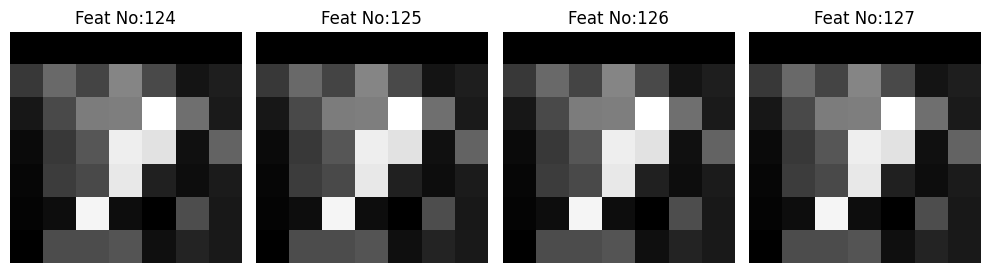

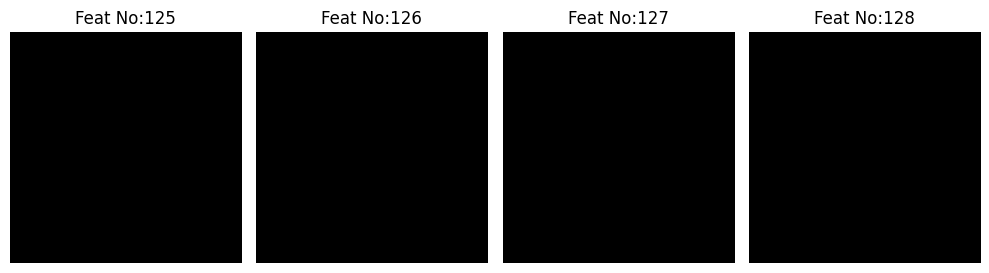

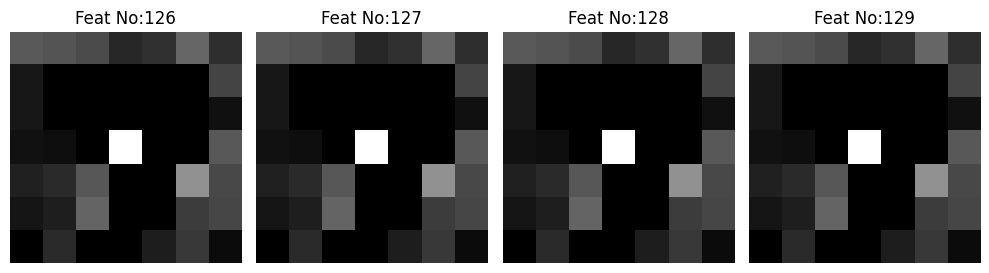

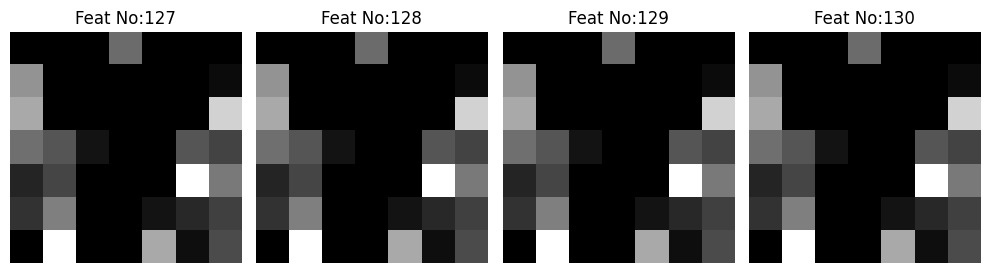

In [ ]:
for c, feat in enumerate(encodedImage):
  fig, ax = plt.subplots(1,4,figsize=(10,10))
  for i, x in enumerate(ax):
    show(feat, ax=ax[i], title=f'Feat No:{str(c+i)}')
  plt.tight_layout()

In [ ]:
latentVectors = []
classes = []
for img, cls in testLoader:
  img = img.to(device)
  latentVectors.append(model.encoder(img).view(len(img), -1))
  classes.extend(cls)

latentVectors = torch.cat(latentVectors).cpu().detach().numpy()

# On the right hand side color bar represents the classes and color depicts the same color in the clusters.

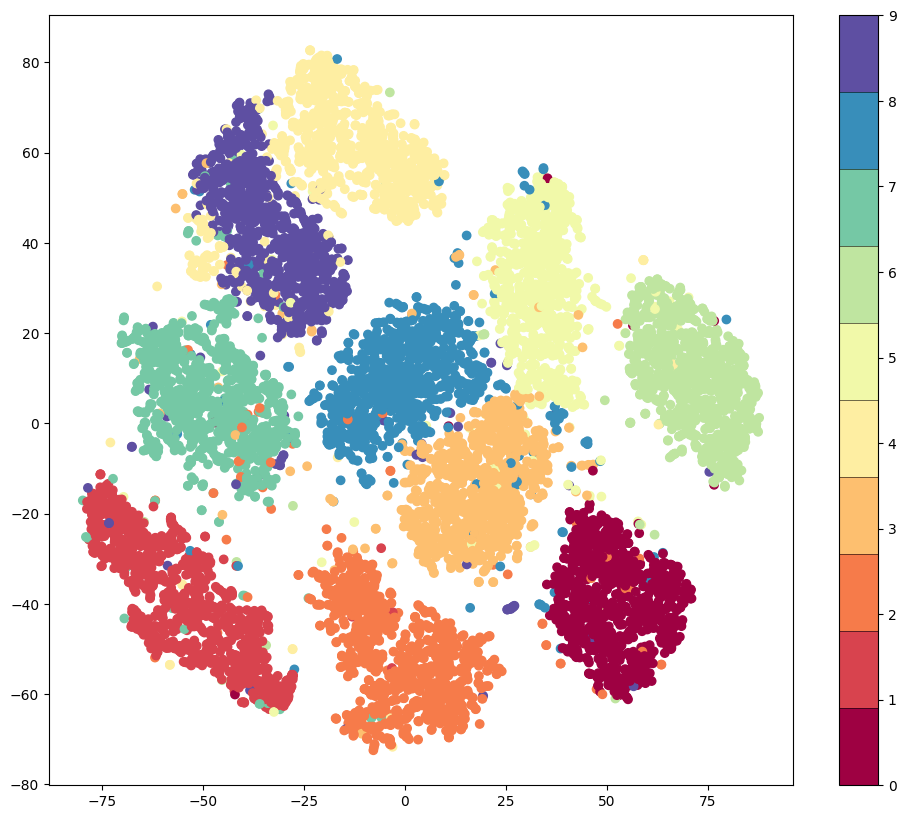

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(2)
clustured = tsne.fit_transform(latentVectors)
fig = plt.figure(figsize=(12,10))
cmap = plt.get_cmap('Spectral', 10)
plt.scatter(*zip(*clustured), c = classes, cmap = cmap)
plt.colorbar(drawedges=True)